This notebook is a continuation of our [previous notebook](https://www.kaggle.com/code/mennatullahelsahy/airline-passenger-satisfaction), in which we explored the [Airline Passenger Satisfaction Disease](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) dataset in order to gain insights about Passenger Satisfaction and its causses. In the this notebook we carry on with building a machine learning model to identify Passenger Satisfaction.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.impute import KNNImputer
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report ,roc_curve, auc
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
Data = [train,test]
data_names=['training data','testing data']

train.shape


(103904, 25)

<a id="7"></a>
#  <p style="padding:5px;background-color:#7EC0EE;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Data preprocessing 🔧</p>

🔘 **Data preprocessing**  refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

🔘 **step 1 : Deleting unuseful columns**


<div style = 'border : 3px solid lightblue; background-color:#F0F8FF;padding:10px'>

    
**<p style="color:red">Observations 📋</p>**
    
🔘 There are two columns **Unnamed: 0** and **id**,These two columns are of no use in the classification
    
**<p style="color:red">Decisions 📋</p>**
    
🔘 It is better to delete these two columns 👇

In [3]:
for x in Data:
  x.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [4]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
test.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

-------



🔘 **step 2 : Finding and cleaning null values**


In [6]:
def calculate_missing_values(data):
    total_missing = data.isnull().sum()  # Count the missing values in each column
    percent_missing = round((total_missing / len(data)) * 100,3)  # Calculate the percentage

    missing_data = pd.DataFrame({
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })

    missing_data = missing_data.sort_values(by='Percent Missing', ascending=False)
    return missing_data

In [7]:
calculate_missing_values(train)

,Total Missing,Percent Missing
Arrival Delay in Minutes,310,0.298
Gender,0,0.000
Seat comfort,0,0.000
Departure Delay in Minutes,0,0.000
Cleanliness,0,0.000
Inflight service,0,0.000
Checkin service,0,0.000
Baggage handling,0,0.000
Leg room service,0,0.000
On-board service,0,0.000


In [8]:
calculate_missing_values(test)

,Total Missing,Percent Missing
Arrival Delay in Minutes,83,0.32
Gender,0,0.00
Seat comfort,0,0.00
Departure Delay in Minutes,0,0.00
Cleanliness,0,0.00
Inflight service,0,0.00
Checkin service,0,0.00
Baggage handling,0,0.00
Leg room service,0,0.00
On-board service,0,0.00


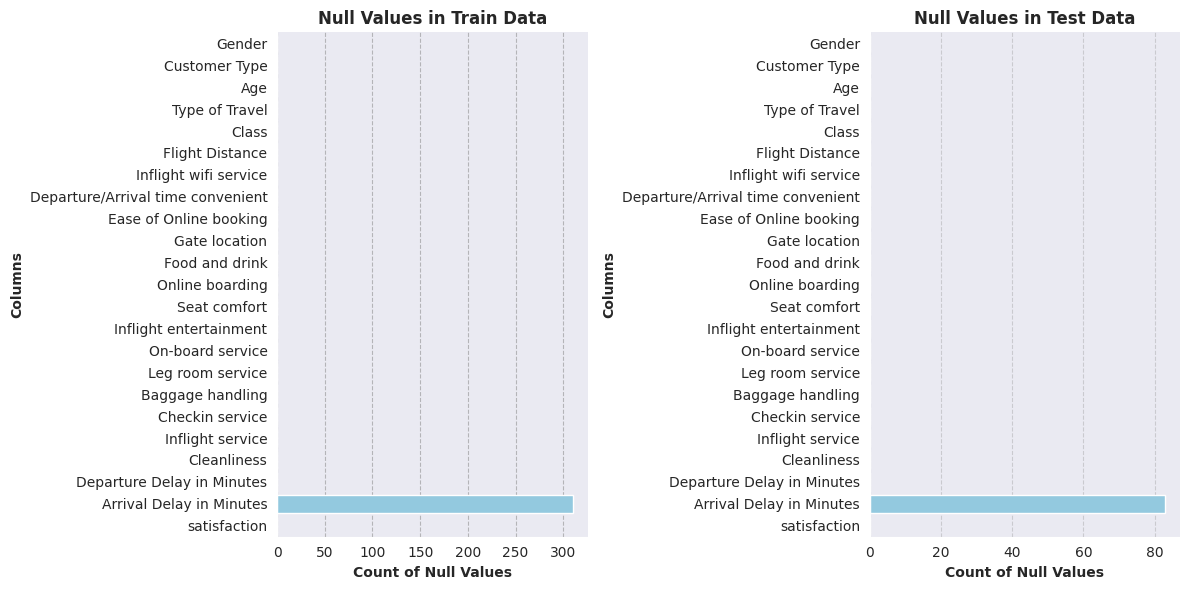

In [9]:
sns.set_style("darkgrid")


train_null_counts = train.isnull().sum()
test_null_counts = test.isnull().sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=train_null_counts, y=train_null_counts.index, ax=axes[0], color='skyblue')
axes[0].set_title('Null Values in Train Data', fontweight='bold')
axes[0].set_xlabel('Count of Null Values', fontweight='bold')
axes[0].set_ylabel('Columns', fontweight='bold')
axes[0].grid(axis='x', linestyle='--', color='gray', alpha=0.5)
sns.despine(ax=axes[0])

sns.barplot(x=test_null_counts, y=test_null_counts.index, ax=axes[1], color='skyblue')
axes[1].set_title('Null Values in Test Data', fontweight='bold')
axes[1].set_xlabel('Count of Null Values', fontweight='bold')
axes[1].set_ylabel('Columns', fontweight='bold')
axes[1].grid(axis='x', linestyle='--', color='gray', alpha=0.3)
sns.despine(ax=axes[1])

plt.tight_layout()

plt.show()

<div style = 'border : 3px solid lightblue; background-color:#F0F8FF;padding:10px'>

    
**<p style="color:red">Observations 📋</p>**
    
🔘 Arrival Delay in Minutes column contain null values.
    
  * For training data **310** null values ~ (0.298%)
    
  * For testing data **83** null values ~ (0.32%)
    
**<p style="color:red">Decisions 📋</p>**
    
🔘 Drop **Nan** values in Arrival Delay in Minutes column 👇

In [10]:
train.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [11]:
test.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [12]:
train['Arrival Delay in Minutes'].isnull().any()

False

In [13]:
test['Arrival Delay in Minutes'].isnull().any()

False

-------

🔘 **step 3 : Delete duplicate data**

In [14]:
for data , name in zip(Data,data_names):
   print(f'There is {data.duplicated().sum()} duplicated data in {name}')

There is 0 duplicated data in training data
There is 0 duplicated data in testing data


<div style = 'border : 3px solid lightblue; background-color:#F0F8FF;padding:10px'>

    
**<p style="color:red">Observations 📋</p>**
    
🔘 There is no duplicate data in both training and testing data

---


🔘 **step 4 : Handling Outliers**

In [15]:
def calculate_outliers_percentage(df):

    # Calculate the interquartile range (IQR) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the number of outliers in each column
    num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

    # Calculate the percentage of outliers in each column
    pct_outliers = round(num_outliers / len(df) * 100 , 4)

    return pct_outliers

In [16]:
outliers_train = pd.DataFrame(calculate_outliers_percentage(train), columns=['% Outliers'])
outliers_train.index.name = 'Column Name'
outliers_train.reset_index(inplace=True)
outliers_train

,Column Name,% Outliers
0,Age,0.0000
1,Arrival Delay in Minutes,13.4699
2,Baggage handling,0.0000
3,Checkin service,12.4071
4,Class,0.0000
5,Cleanliness,0.0000
6,Customer Type,0.0000
7,Departure Delay in Minutes,13.9274
8,Departure/Arrival time convenient,0.0000
9,Ease of Online booking,0.0000


In [17]:
outliers_test = pd.DataFrame(calculate_outliers_percentage(test), columns=['% Outliers'])
outliers_test.index.name = 'Column Name'
outliers_test.reset_index(inplace=True)
outliers_test

,Column Name,% Outliers
0,Age,0.0000
1,Arrival Delay in Minutes,13.6639
2,Baggage handling,0.0000
3,Checkin service,12.3817
4,Class,0.0000
5,Cleanliness,0.0000
6,Customer Type,0.0000
7,Departure Delay in Minutes,13.6794
8,Departure/Arrival time convenient,0.0000
9,Ease of Online booking,0.0000


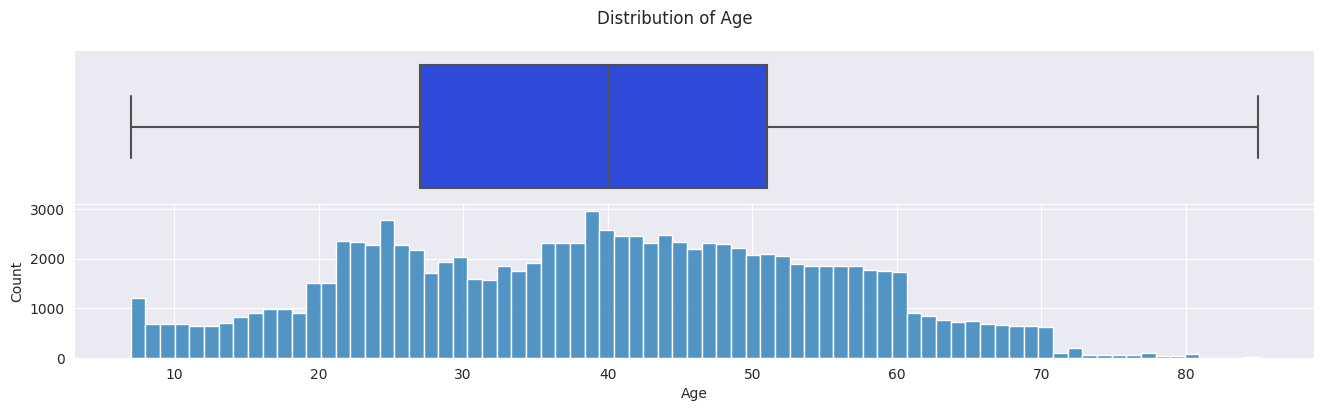

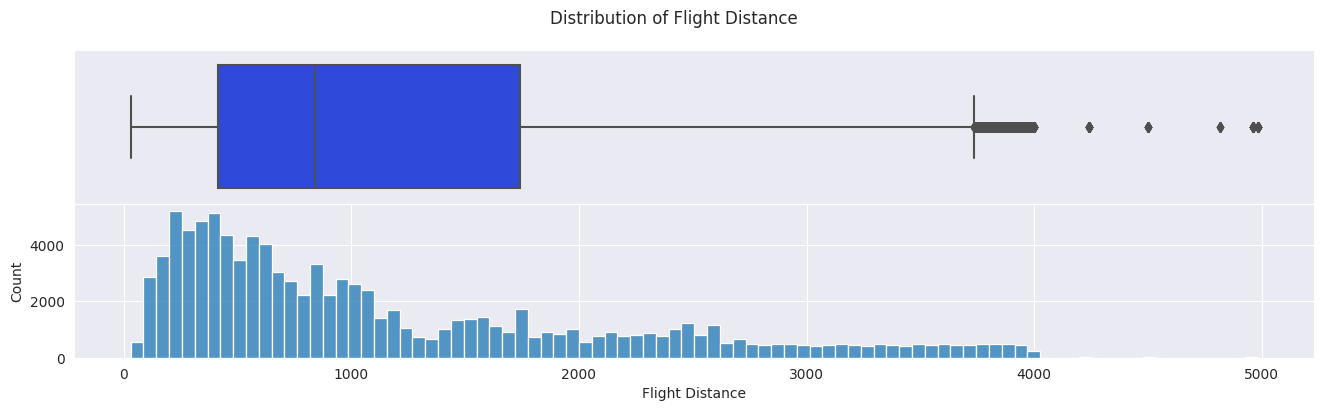

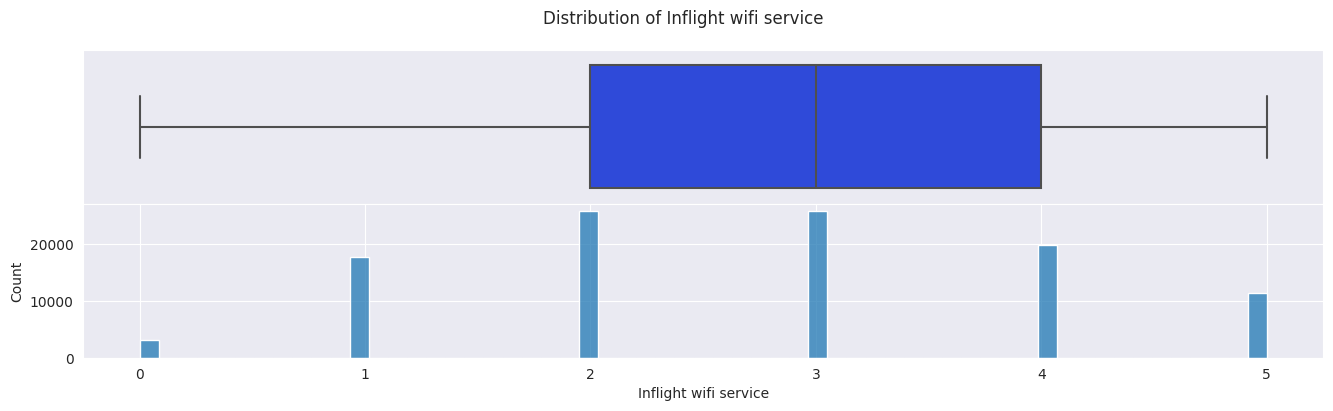

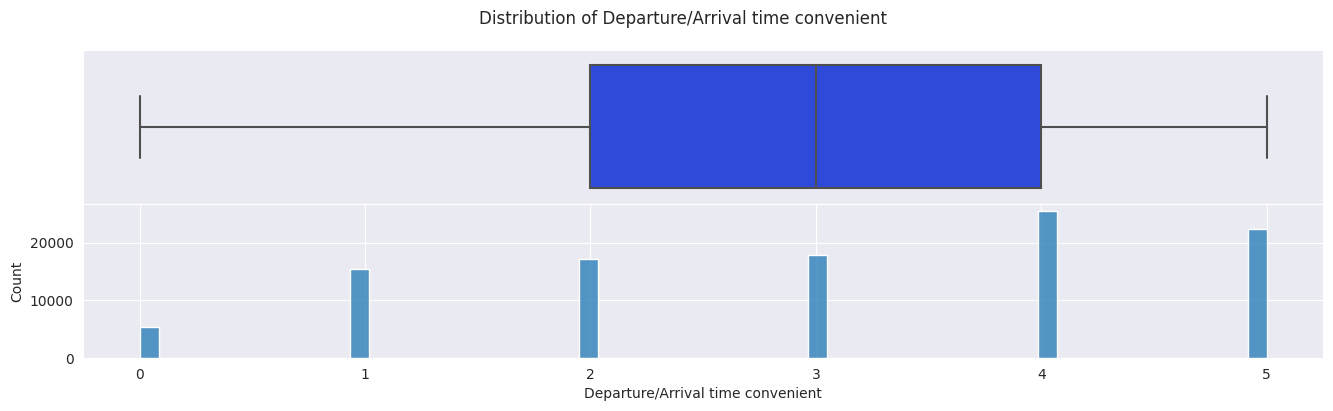

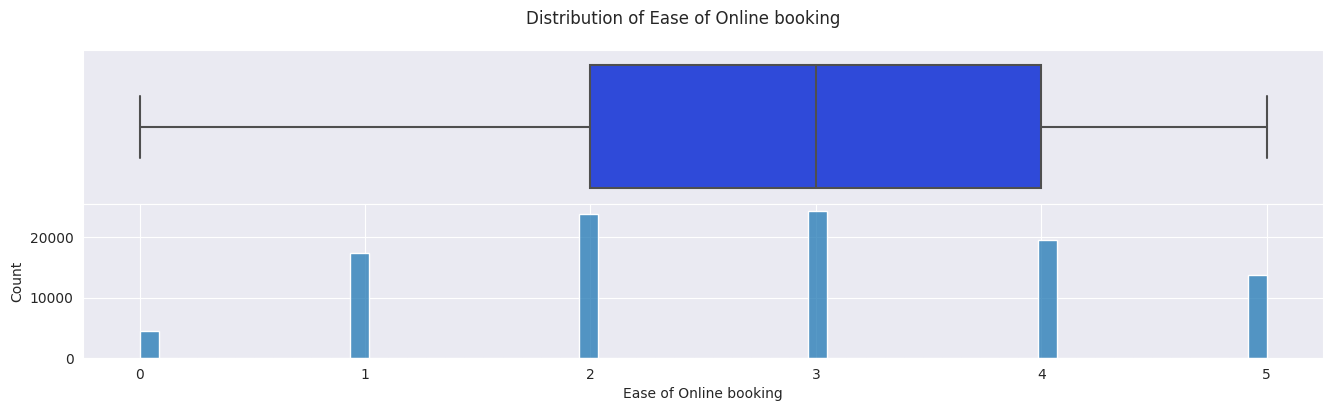

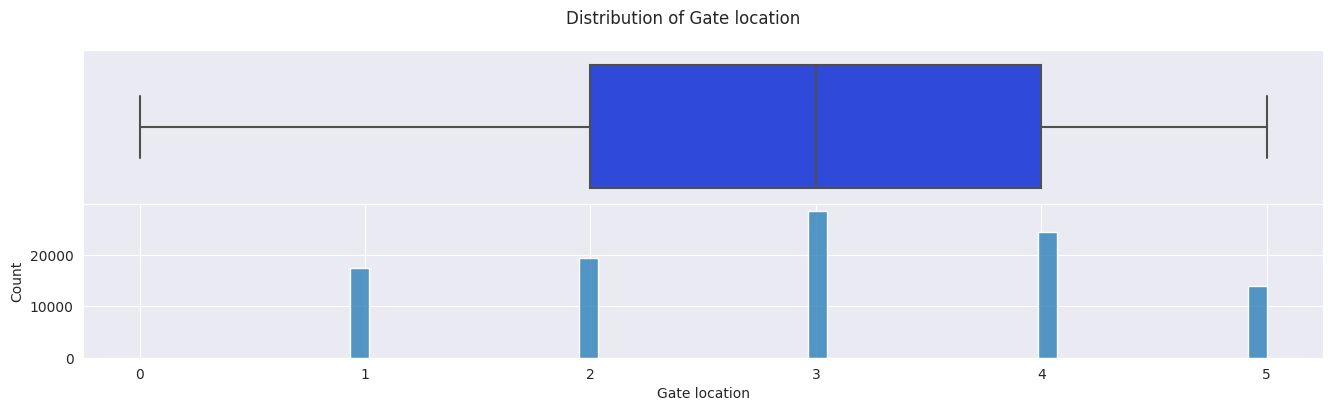

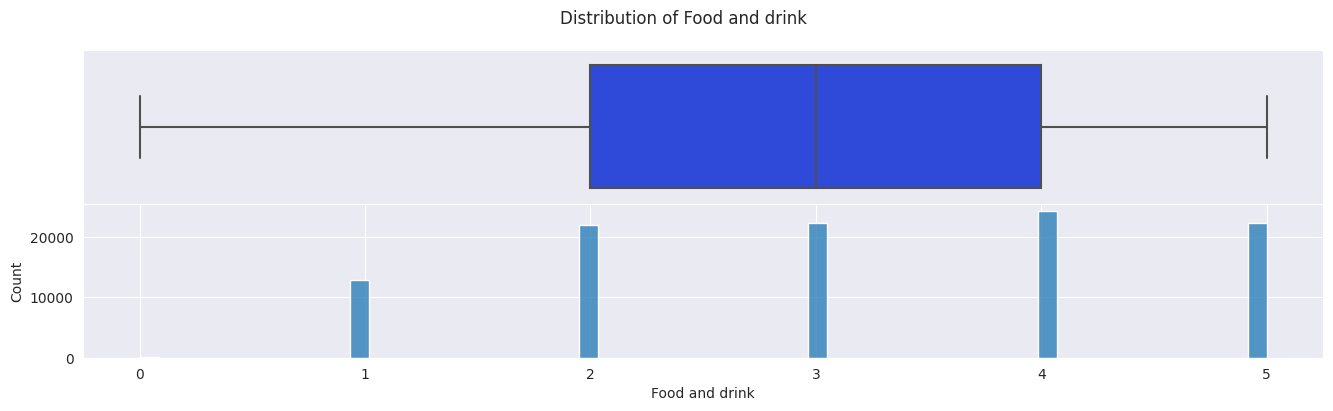

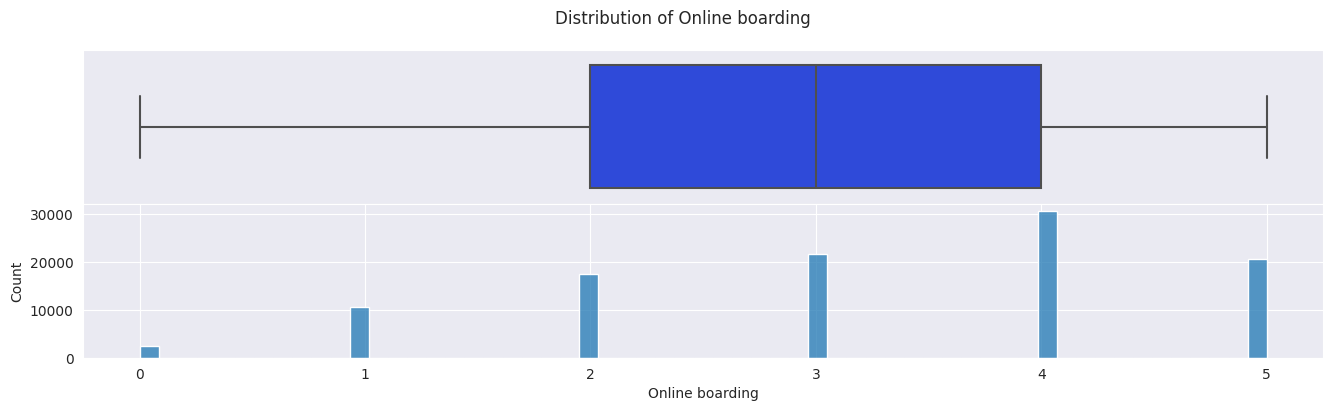

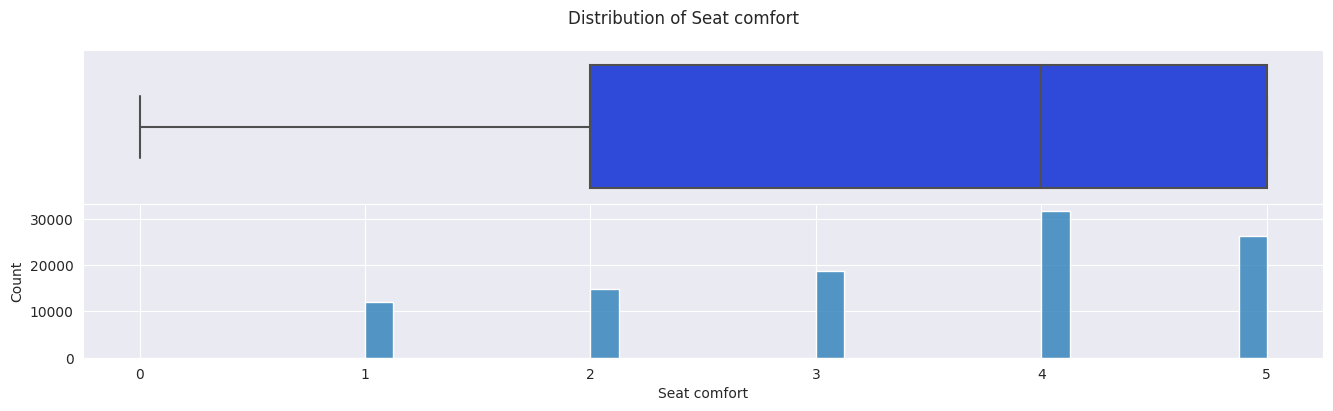

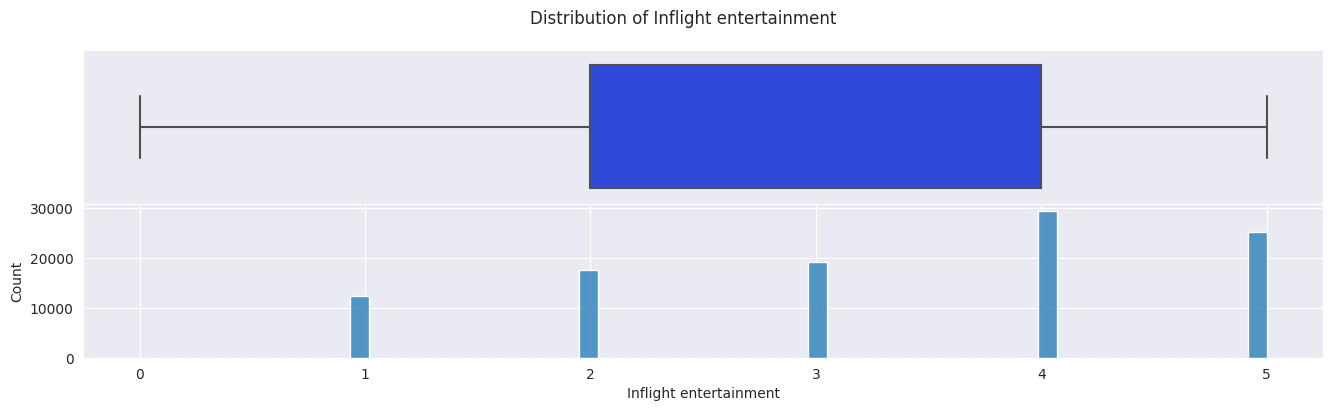

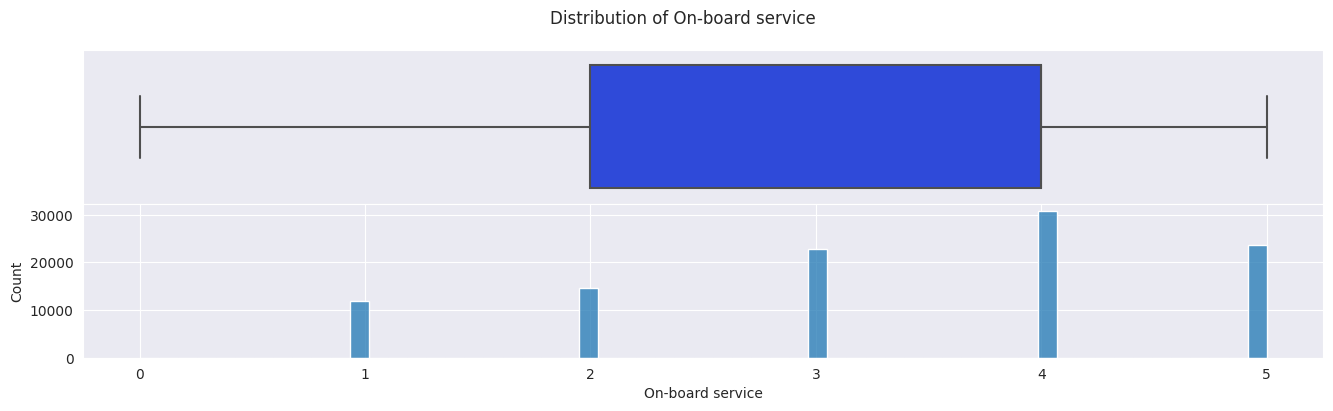

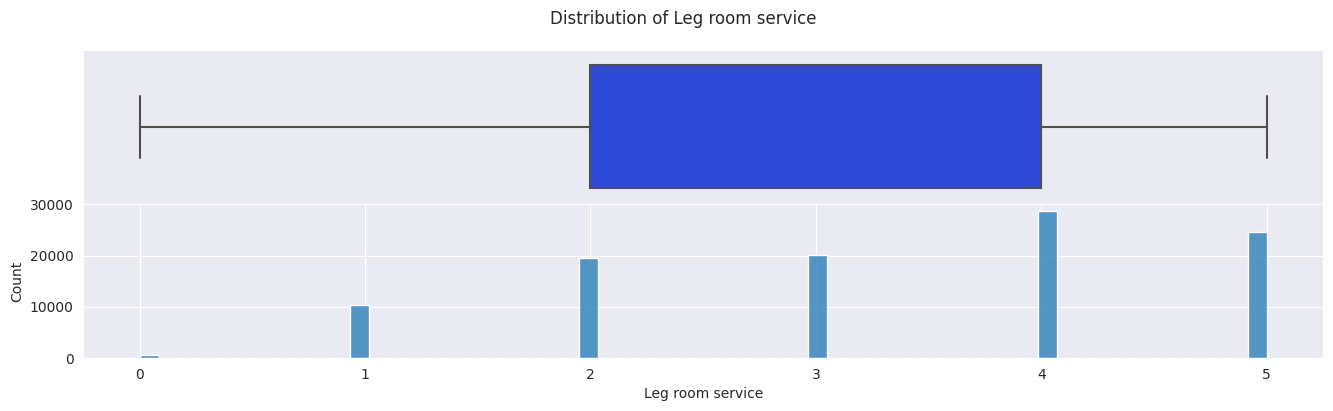

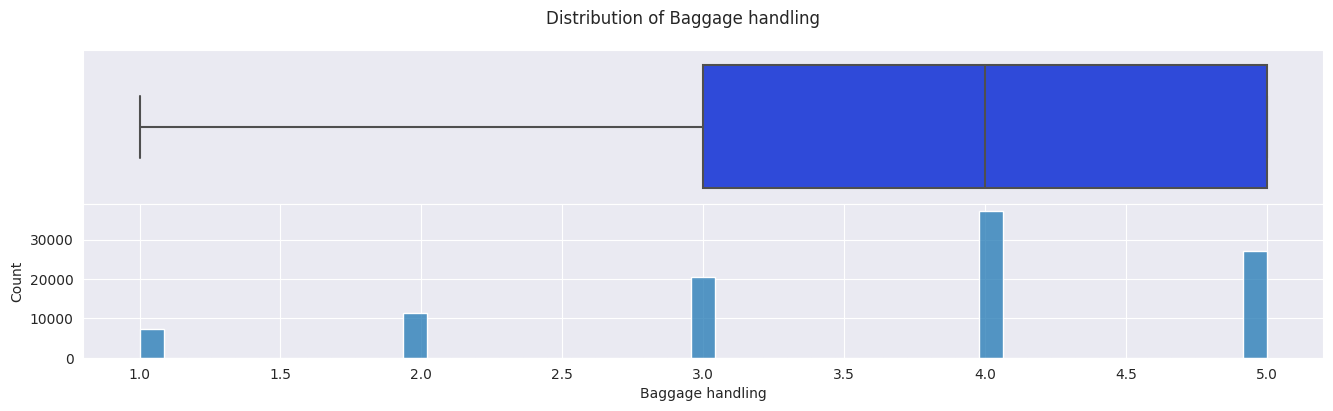

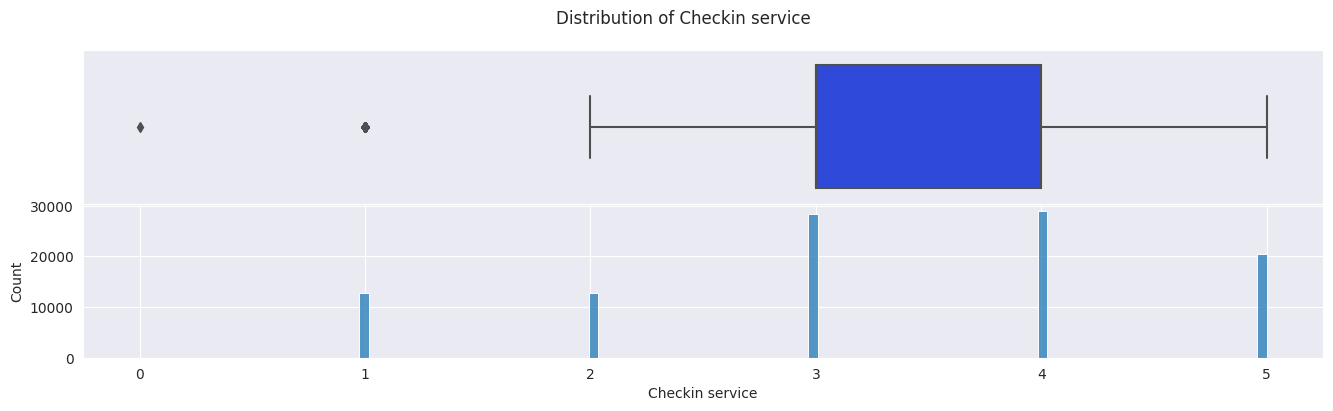

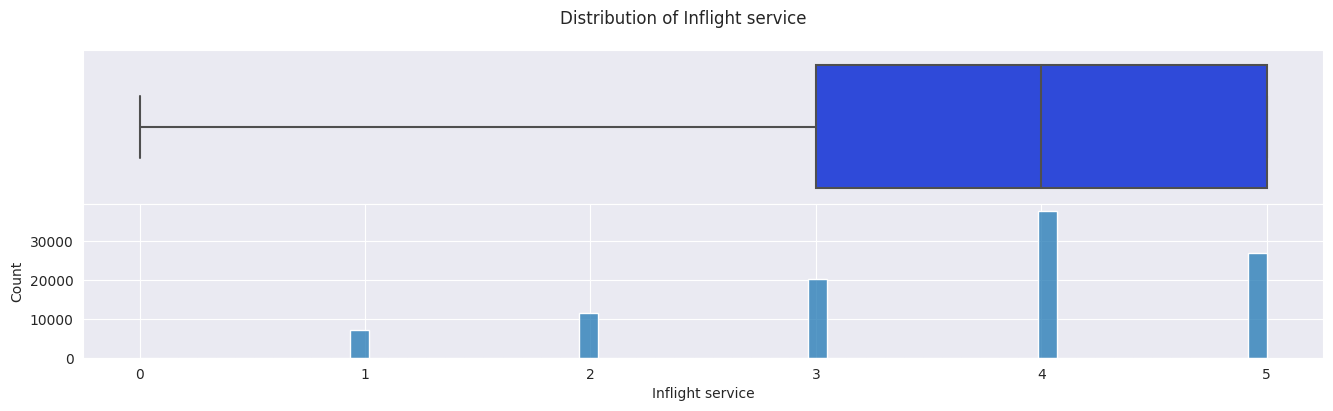

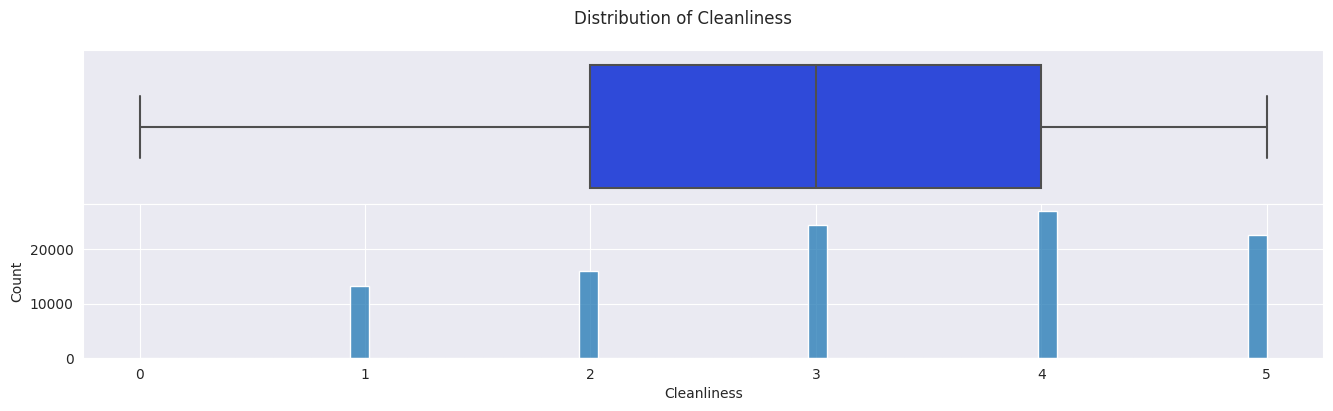

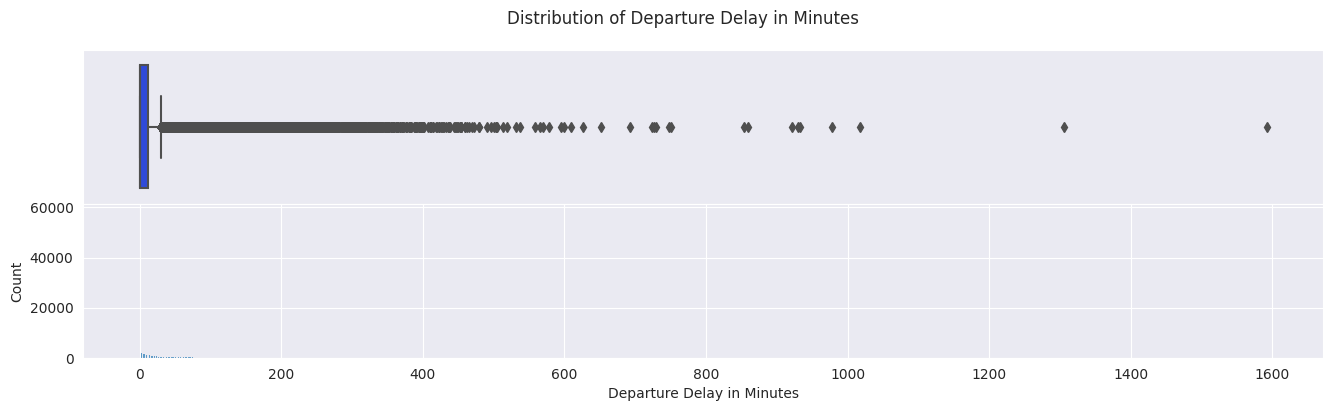

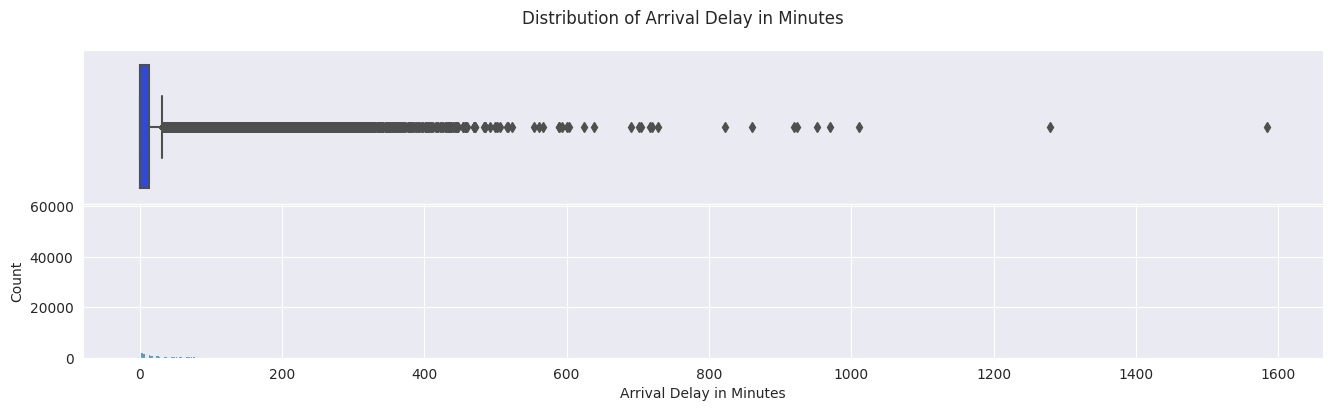

In [18]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)


numerical = train.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=train, x=col, ax=ax1, palette=colors1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=train, x=col, ax=ax2, palette=colors1)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

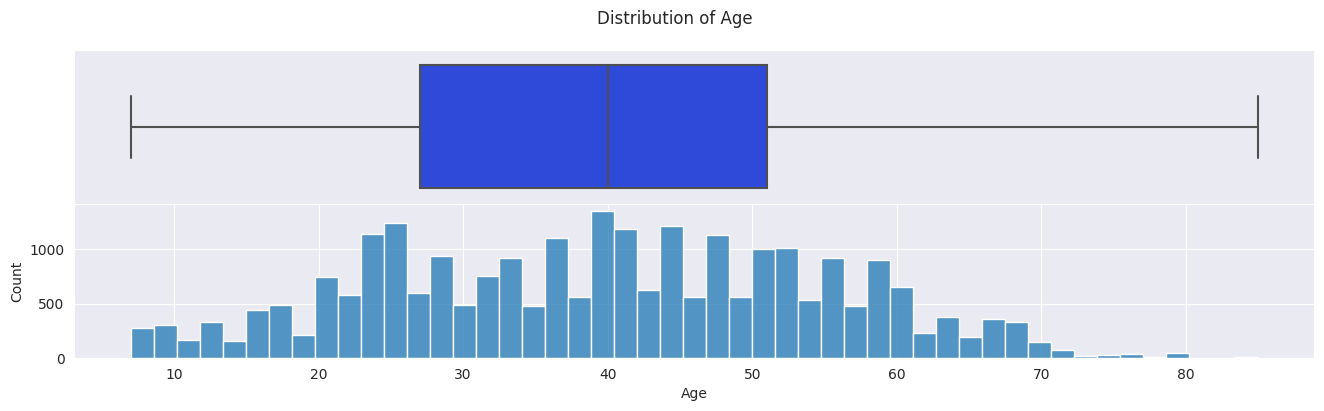

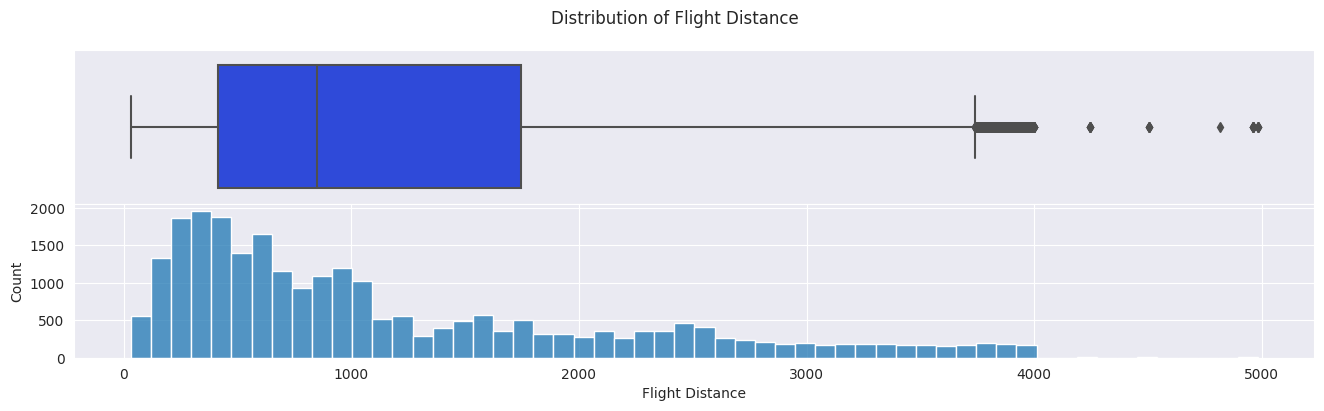

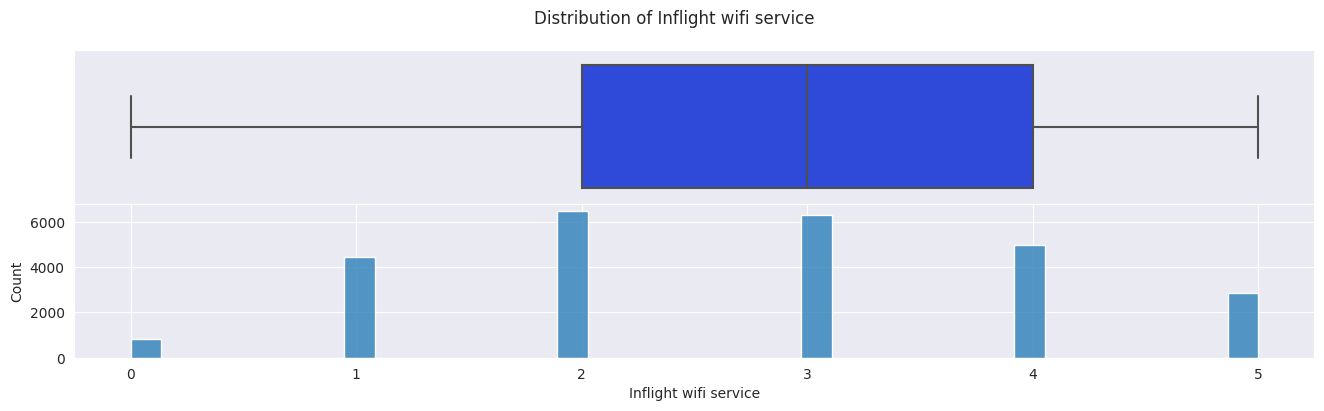

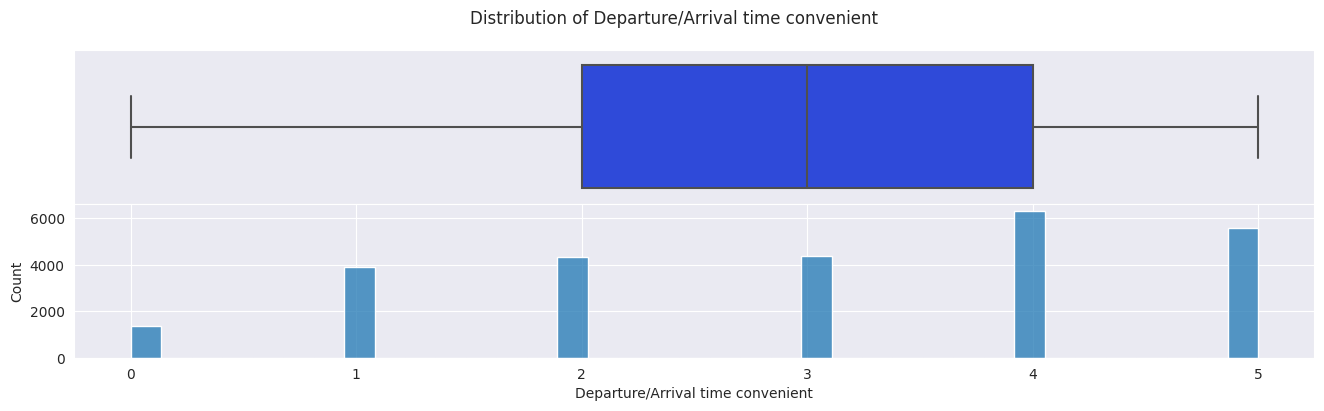

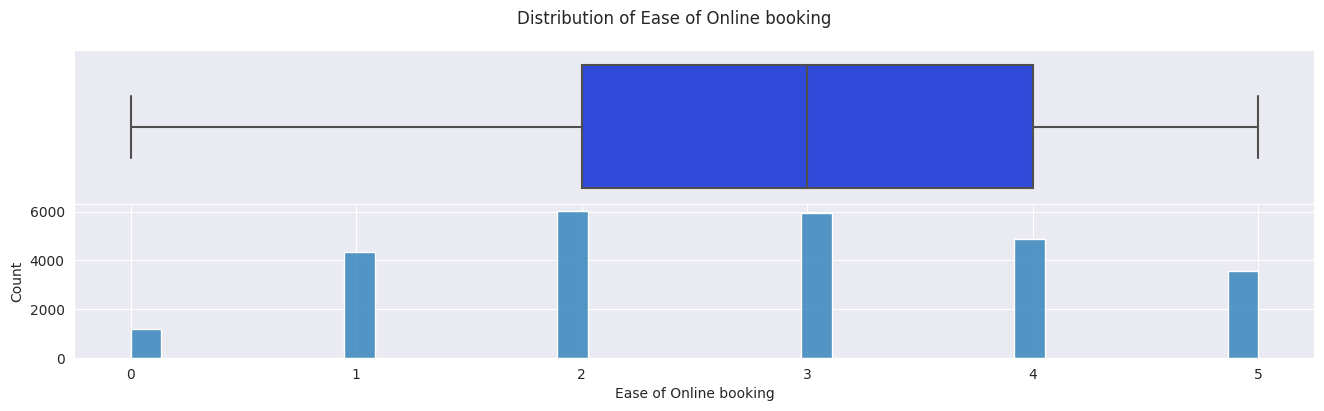

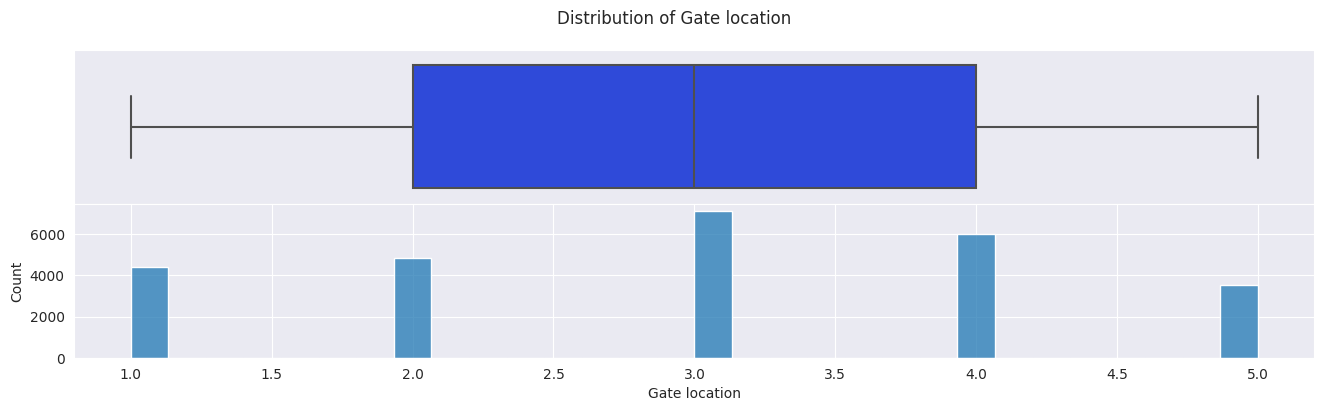

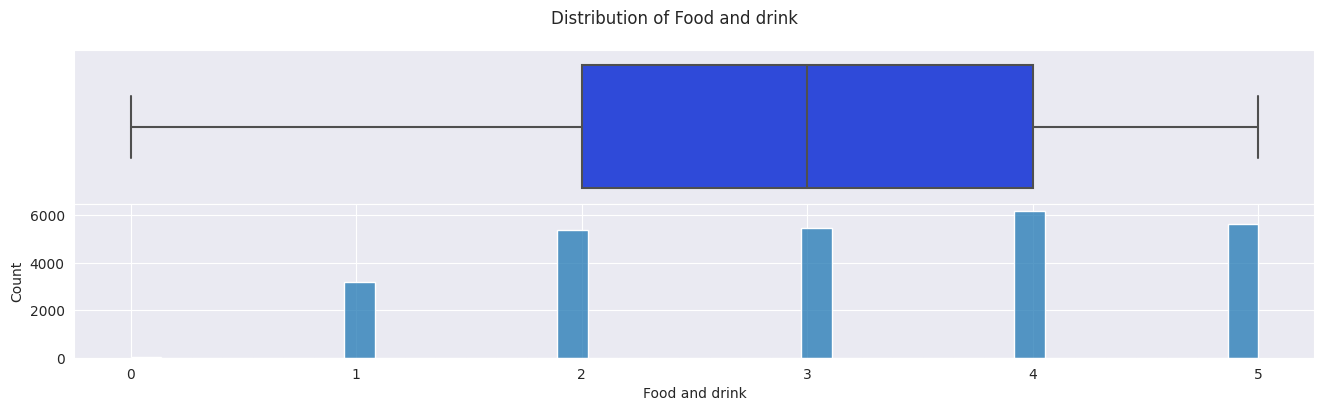

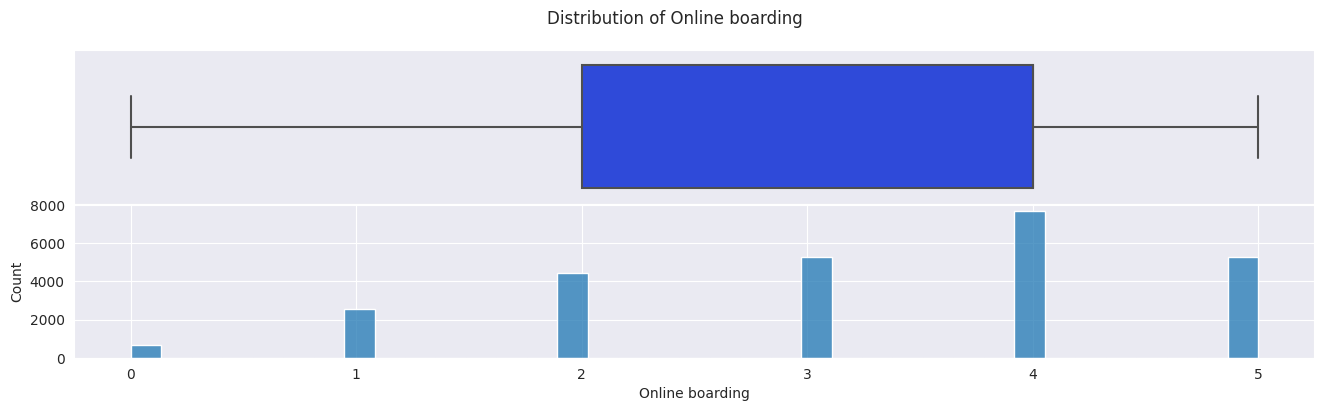

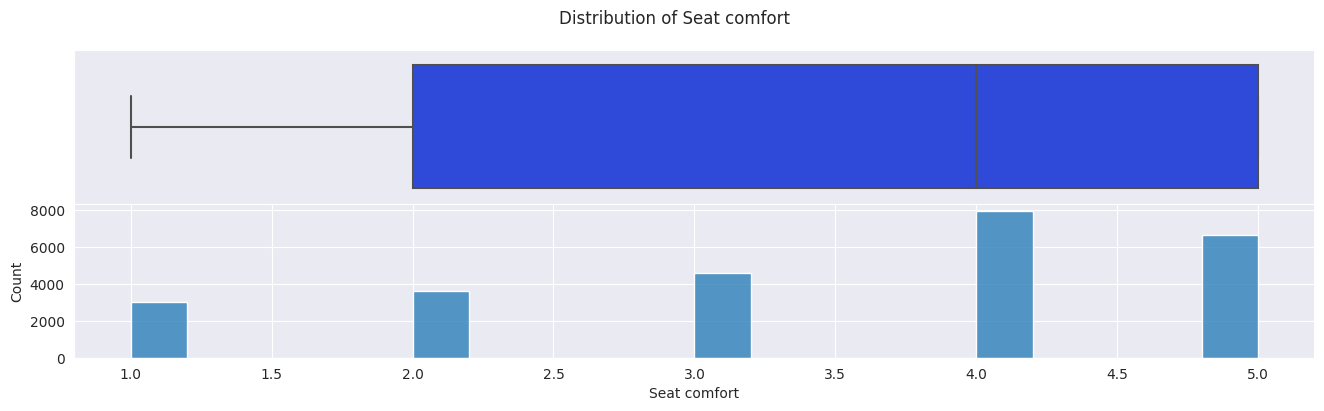

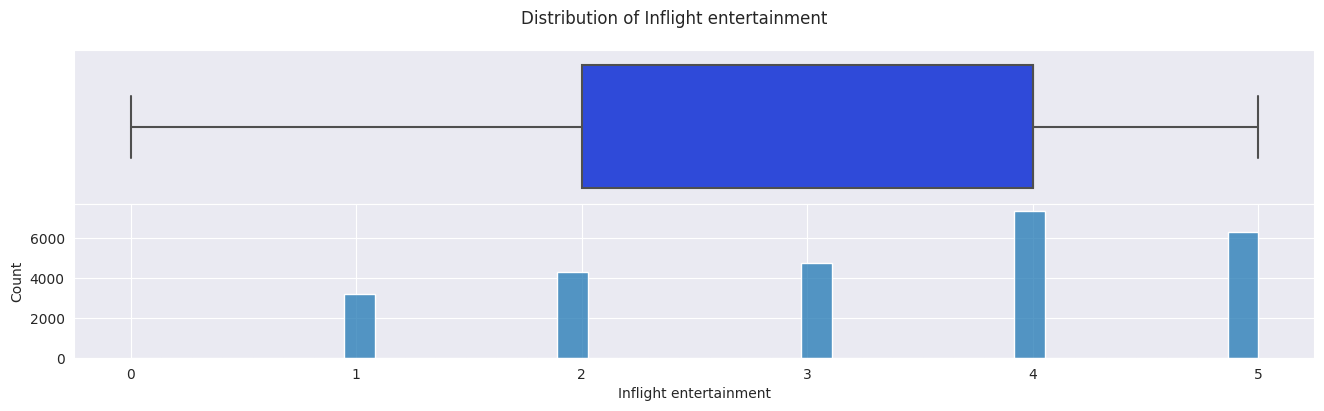

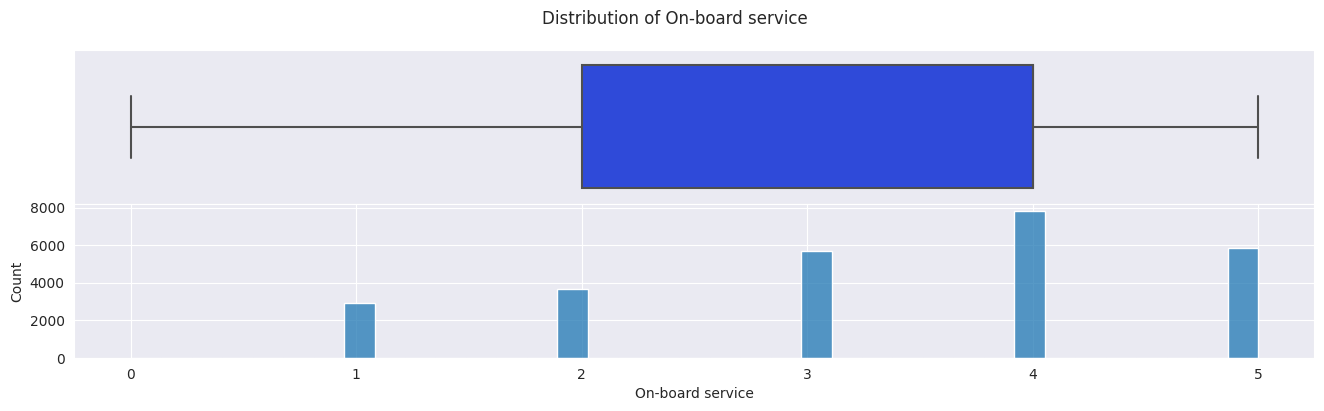

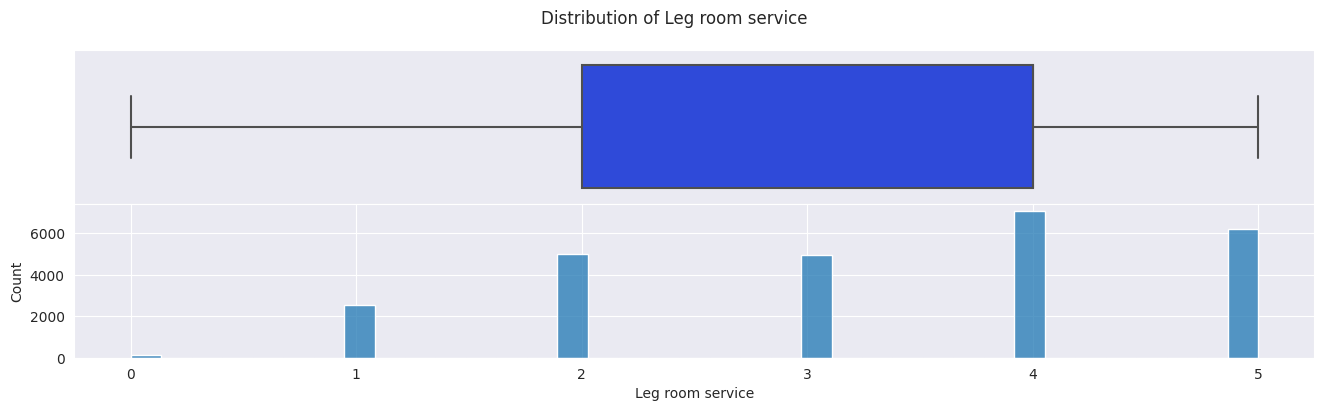

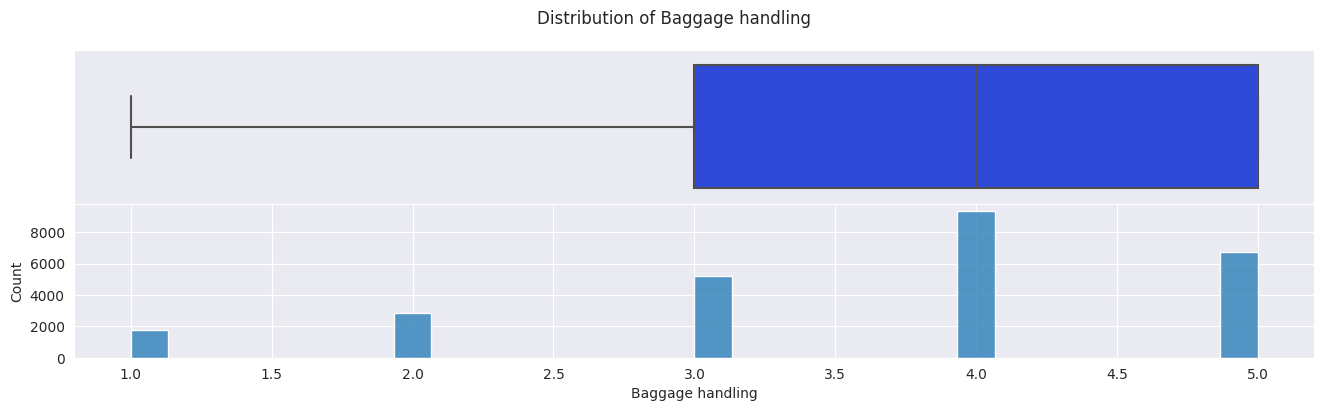

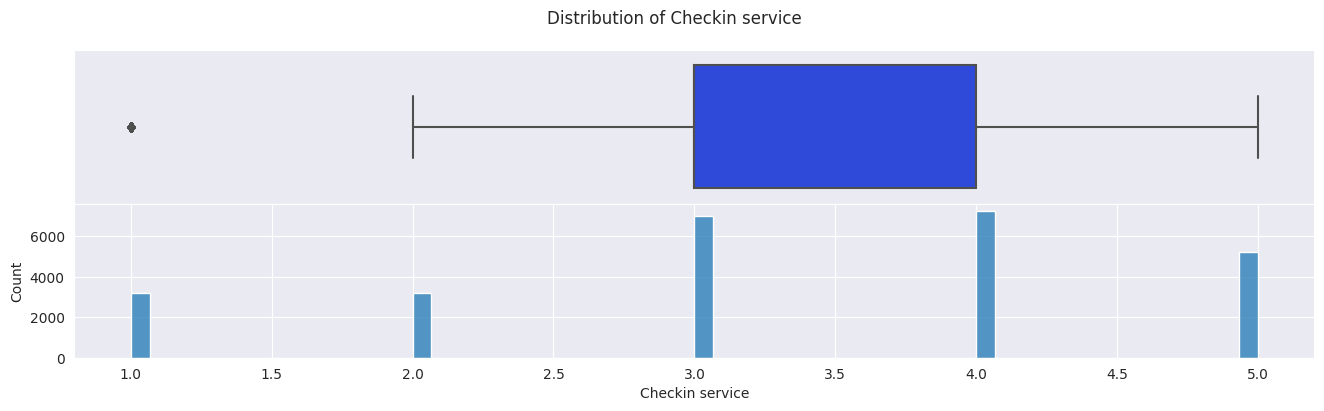

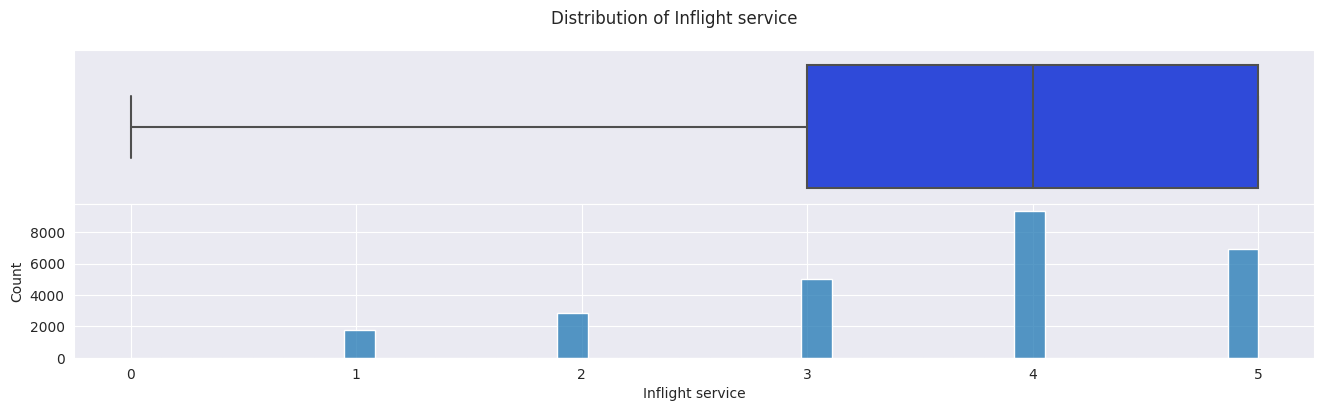

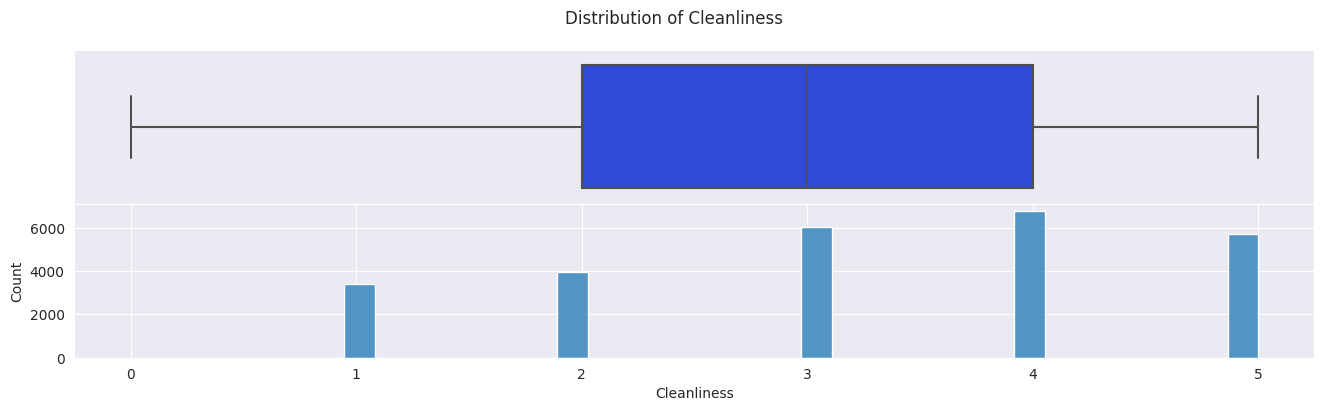

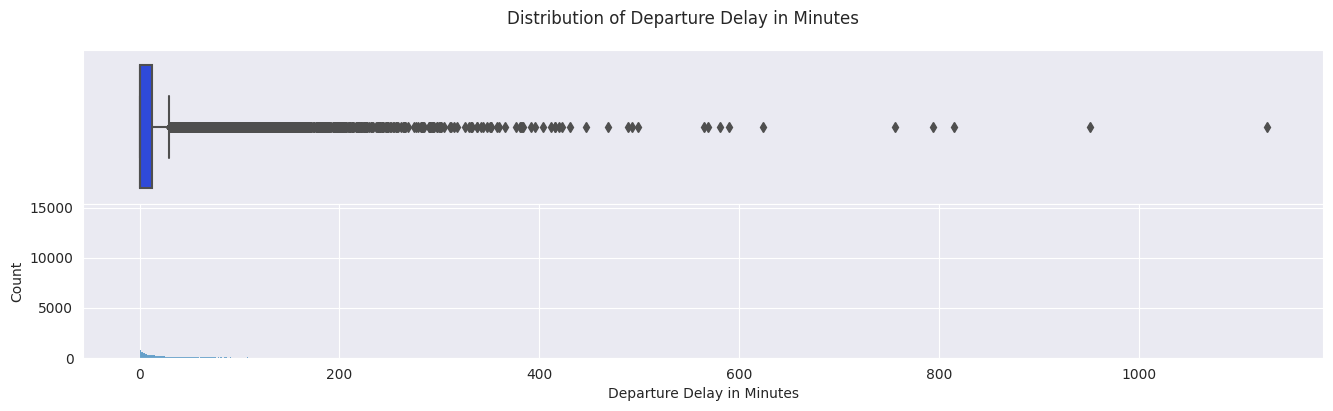

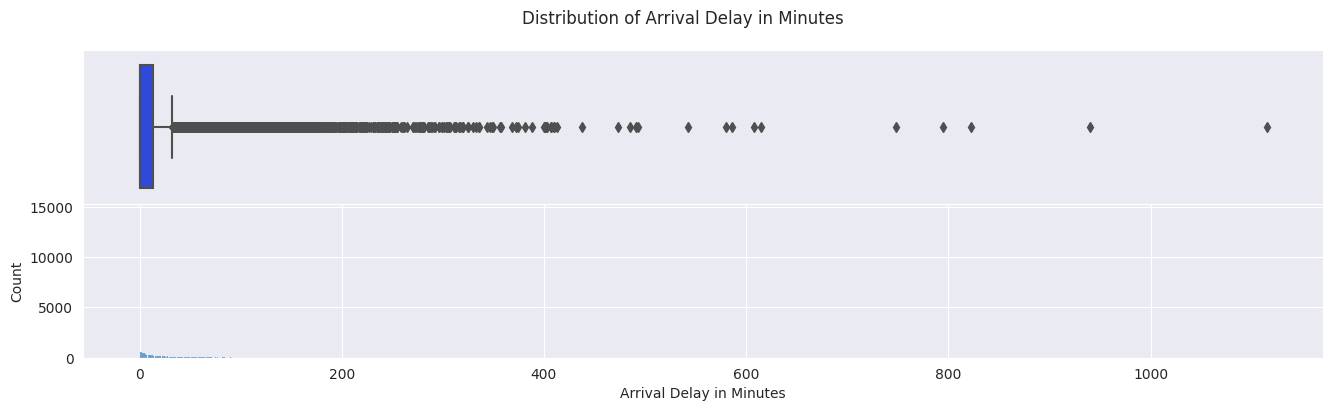

In [19]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)


numerical = test.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=test, x=col, ax=ax1, palette=colors1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=test, x=col, ax=ax2, palette=colors1)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

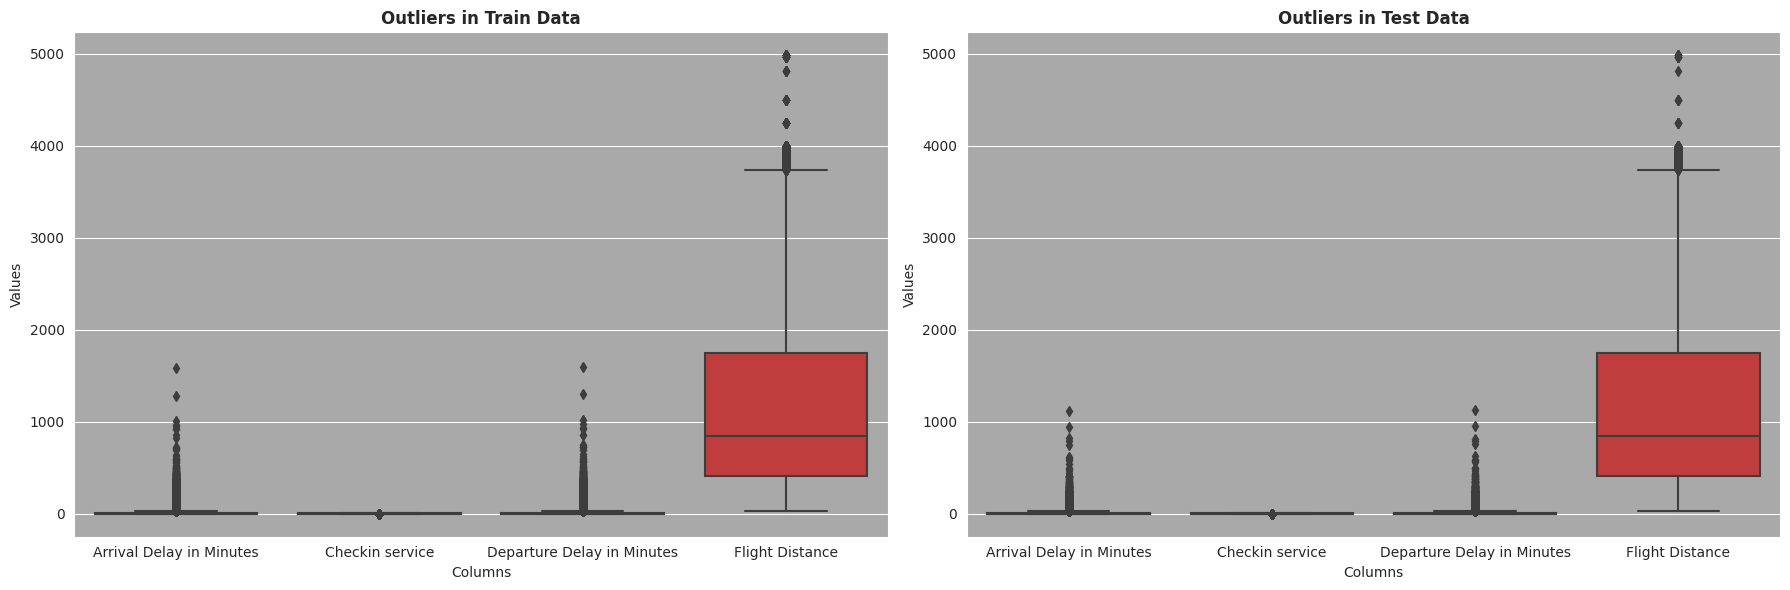

In [20]:
columns_to_visualize = ['Arrival Delay in Minutes', 'Checkin service', 'Departure Delay in Minutes', 'Flight Distance']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.boxplot(data=train[columns_to_visualize], ax=axes[0])
axes[0].set_title('Outliers in Train Data',fontweight='bold')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Values')
axes[0].set_facecolor('darkgray')

sns.boxplot(data=test[columns_to_visualize], ax=axes[1])
axes[1].set_title('Outliers in Test Data',fontweight='bold')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Values')
axes[1].set_facecolor('darkgray')

plt.tight_layout()

plt.show()

<div style = 'border : 3px solid lightblue; background-color:#F0F8FF;padding:10px'>

    
**<p style="color:red">Observations 📋</p>**
### There are outliers in **Train data**. In
- 'Arrival Delay in Minutes' ~ 13.42%
- 'Checkin service' ~ 12.40%
- 'Departure Delay in Minutes'~ 13.92%
- 'Flight Distance' ~ 2.20%

### There are outliers in **Test data**. In
- 'Arrival Delay in Minutes' ~ 13.62%
- 'Checkin service' ~ 12.38%
- 'Departure Delay in Minutes' ~ 13.73%
- 'Flight Distance' ~ 2.24%

**<p style="color:red">Decisions 📋</p>**
    
🔘 First drop outliers in 'Flight Distance' column in train and test data

🔘 Second let's impute outliers in 'Checkin service' columns

🔘 Third let's handle outliers in 'Departure Delay in Minutes' column with KNN Algorithm and don't care about outliers in 'Arrival Delay in Minutes' Cuz it will be droped


🔘 **First drop outliers in 'Flight Distance' column in train and test data**

In [21]:
def Outliers(df,col):
  Q1 = df[col].quantile(q=0.25)
  Q3 = df[col].quantile(q=0.75)
  IQR = df[col].apply(stats.iqr)
  df_clean = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
  print("Number of rows before removing outliers:", len(df))
  print("Number of rows after removing outliers:", len(df_clean))

In [22]:
columns = ['Flight Distance']

In [23]:
#REMOVE OUTLIERS IN TRAIN DATA
Outliers(train,columns)

Number of rows before removing outliers: 103594
Number of rows after removing outliers: 101307


- **That means 2291 row was removed ~ 2.20% of total rows**

In [24]:
#REMOVE OUTLIERS IN TEST DATA
Outliers(test,columns)

Number of rows before removing outliers: 25893
Number of rows after removing outliers: 25313


- **That means 584 row was removed ~ 2.24% of total rows**

🔘 **Second impute 'Checkin service' column with Median imputation**
- Median imputation: This algorithm replaces outliers with the median value of the data. The median is a robust statistic that is not heavily influenced by outliers.


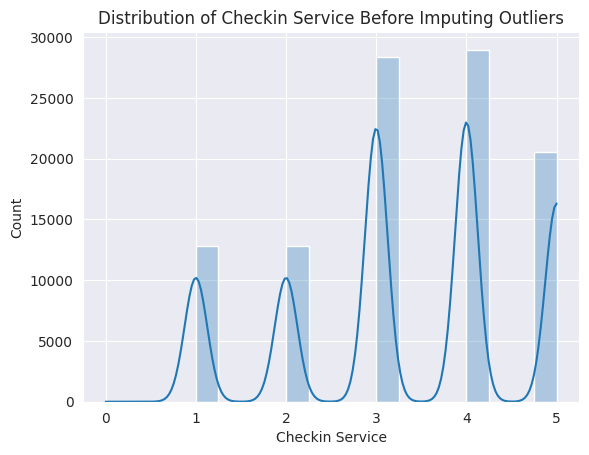

In [25]:
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service Before Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

In [26]:
median_value = train['Checkin service'].median()
median_value2 = test['Checkin service'].median()

In [27]:
lower_bound = median_value - 1.5 * (train['Checkin service'].quantile(0.75) - train['Checkin service'].quantile(0.25))
upper_bound = median_value + 1.5 * (train['Checkin service'].quantile(0.75) - train['Checkin service'].quantile(0.25))

In [28]:
# Impute outliers in train data with median value
train.loc[(train['Checkin service'] < lower_bound) | (train['Checkin service'] > upper_bound), 'Checkin service'] = median_value

In [29]:
lower_bound = median_value2 - 1.5 * (test['Checkin service'].quantile(0.75) - test['Checkin service'].quantile(0.25))
upper_bound = median_value2 + 1.5 * (test['Checkin service'].quantile(0.75) - test['Checkin service'].quantile(0.25))

In [30]:
# Impute outliers in test data with median value
test.loc[(test['Checkin service'] < lower_bound) | (test['Checkin service'] > upper_bound), 'Checkin service'] = median_value2

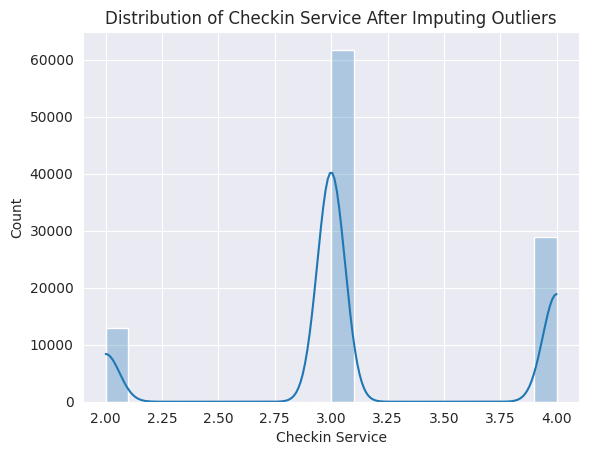

In [31]:
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service After Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

🔘 **Third let's handling outliers in 'Departure Delay in Minutes' column with *KNN Algorithm***

In [32]:
column_with_outliers = ['Departure Delay in Minutes']

In [33]:
# IN TRAIN DATA
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(train[column_with_outliers])
train[column_with_outliers] = imputed_values

In [34]:
# IN TEST DATA
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(test[column_with_outliers])
test[column_with_outliers] = imputed_values

---

🔘 **step 5 : Encoding Target Column**

In [35]:
le = LabelEncoder()

In [36]:
col_encoded = le.fit_transform(train['satisfaction'])

In [37]:
train['satisfaction'] = col_encoded

In [38]:
train['satisfaction'].unique()

array([0, 1])

🔘 **step 6 : Unnecessary Features**

Text(0.5, 1.0, 'Data correlations')

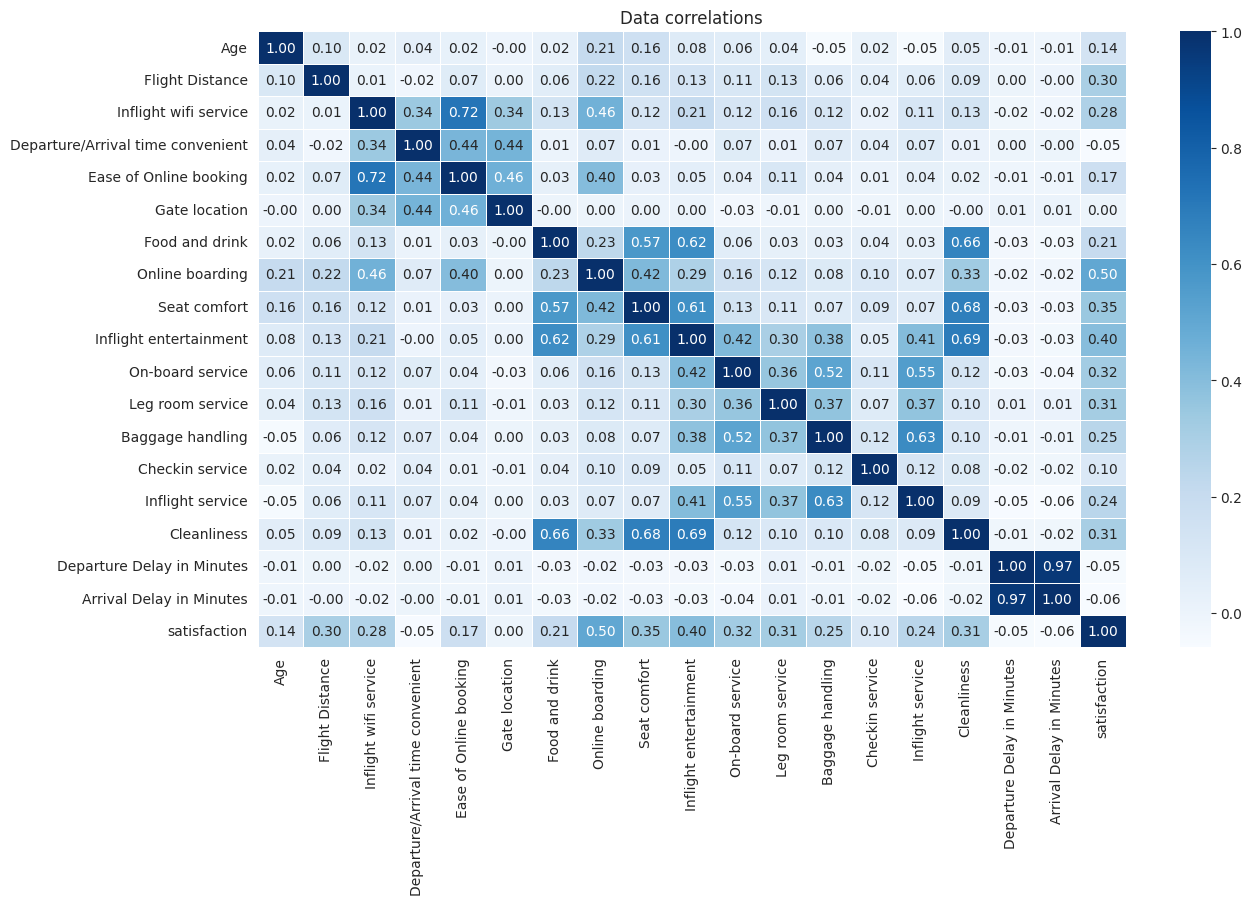

In [39]:
correlation=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

In [40]:
drop_columns = ['Gender','Arrival Delay in Minutes','Gate location','Departure/Arrival time convenient']

In [41]:
train.drop(drop_columns,axis=1,inplace=True)

In [42]:
train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,25.0,0
1,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,3,4,1,1.0,0
2,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,3,4,2,11.0,0
4,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


In [43]:
test.drop(drop_columns,axis=1,inplace=True)

In [44]:
test.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,52,Business travel,Eco,160,5,3,3,4,3,5,5,5,5,2,5,5,50.0,satisfied
1,Loyal Customer,36,Business travel,Business,2863,1,3,5,4,5,4,4,4,4,3,4,5,0.0,satisfied
2,disloyal Customer,20,Business travel,Eco,192,2,2,2,2,2,2,4,1,3,2,2,2,0.0,neutral or dissatisfied
3,Loyal Customer,44,Business travel,Business,3377,0,0,3,4,4,1,1,1,1,3,1,4,0.0,satisfied
4,Loyal Customer,49,Business travel,Eco,1182,2,4,4,1,2,2,2,2,2,4,2,4,0.0,satisfied


---

<div style = 'border : 3px solid lightblue; background-color:#57BAC2;padding:10px'>



🔘 **step 7 : Data encoding**

- **OneHot Encoding** is a process used in data analysis and machine learning to convert categorical variables into numerical format. It creates binary vectors where each category is encoded as a binary feature. In this encoding scheme, each category is represented by a vector of zeros with only one element being 1, known as the "hot" element. This encoding helps in representing categorical data in a way that can be easily understood and processed by machine learning algorithms.

In [45]:
encoder = OneHotEncoder()

In [46]:
columns_to_encode = ['Customer Type', 'Type of Travel', 'Class']

In [47]:
#FOR TRAIN DATA
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(train[columns_to_encode])

In [48]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [49]:
train.drop(columns_to_encode, axis=1, inplace=True)
train[encoded_column_names] = encoded_columns

In [50]:
train.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,25.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,235,3,3,1,3,1,1,1,5,3,3,4,1,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,562,2,5,2,2,2,2,2,5,3,3,4,2,11.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [51]:
#FOR TEST DATA
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(test[columns_to_encode])

In [52]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [53]:
test.drop(columns_to_encode, axis=1, inplace=True)
test[encoded_column_names] = encoded_columns

In [54]:
test.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,3,3,4,3,5,5,5,5,2,5,5,50.0,satisfied,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,36,2863,1,3,5,4,5,4,4,4,4,3,4,5,0.0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,20,192,2,2,2,2,2,2,4,1,3,2,2,2,0.0,neutral or dissatisfied,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,44,3377,0,0,3,4,4,1,1,1,1,3,1,4,0.0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,49,1182,2,4,4,1,2,2,2,2,2,4,2,4,0.0,satisfied,1.0,0.0,1.0,0.0,0.0,1.0,0.0


---

<div style = 'border : 3px solid lightblue; background-color:#57BAC2;padding:10px'>



🔘 **step 8 : Standardization**

- **Standardization**: Standardization scales features by subtracting the mean and then dividing by the standard deviation. This results in features that have a mean of 0 and a standard deviation of 1.

-

In [55]:
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

In [56]:
scaler = StandardScaler()

In [57]:
# IN TRAIN DATA
scaled_values = scaler.fit_transform(train[columns_to_scale])
train[columns_to_scale] = scaled_values

In [58]:
aggregated_train = train[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Blues')
aggregated_train

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
min,-2.142550,-1.161470,-2.055754,-1.970785,-2.408709,-2.408800,-2.608076,-2.519340,-2.625682,-2.547814,-2.228269,-1.875741,-3.096946,-2.504518,-0.386917
max,3.018552,3.803974,1.709704,1.603383,1.352401,1.296479,1.182991,1.231530,1.255467,1.253304,1.158561,1.370561,1.156211,1.305913,41.379714
median,0.040993,-0.348268,0.203521,0.173716,-0.152043,-0.185632,0.424778,0.481356,0.479237,0.493081,0.311853,-0.252590,0.305580,-0.218259,-0.386917
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005


In [59]:
# IN TEST DATA
scaled_values = scaler.fit_transform(test[columns_to_scale])
test[columns_to_scale] = scaled_values

In [60]:
aggregated_train = train[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Blues')
aggregated_train

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
min,-2.142550,-1.161470,-2.055754,-1.970785,-2.408709,-2.408800,-2.608076,-2.519340,-2.625682,-2.547814,-2.228269,-1.875741,-3.096946,-2.504518,-0.386917
max,3.018552,3.803974,1.709704,1.603383,1.352401,1.296479,1.182991,1.231530,1.255467,1.253304,1.158561,1.370561,1.156211,1.305913,41.379714
median,0.040993,-0.348268,0.203521,0.173716,-0.152043,-0.185632,0.424778,0.481356,0.479237,0.493081,0.311853,-0.252590,0.305580,-0.218259,-0.386917
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005


---

🔘 **step 9 : Data Splitting**

In [61]:
X_train = train.drop(["satisfaction"], axis = 1)
y_train = train["satisfaction"]

X_test = test.drop(["satisfaction"], axis = 1)
y_test = test["satisfaction"]

y_test = y_test.replace({"satisfied":1, "neutral or dissatisfied":0})

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

🔘 **step 10 : Imbalanced Data**

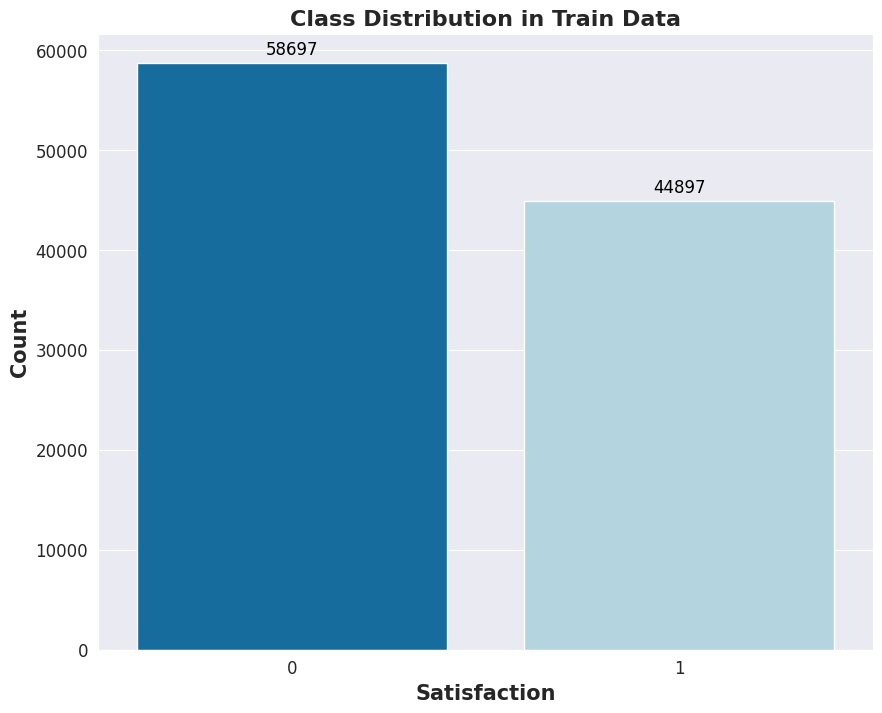

In [62]:
custom_palette = ["#0072B2", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)
ax = sns.countplot(x='satisfaction', data=train)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')

plt.title('Class Distribution in Train Data', fontweight='bold', fontsize=16)
plt.xlabel('Satisfaction', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [63]:
# imbalance data

ROS=RandomOverSampler(random_state=42)
# train
train,y_train=ROS.fit_resample(train,y_train)

# Check before and after ===>overSample
from collections import Counter
print("Updata dataset Train: ",Counter(y_train))



Updata dataset Train:  Counter({0: 58697, 1: 58697})


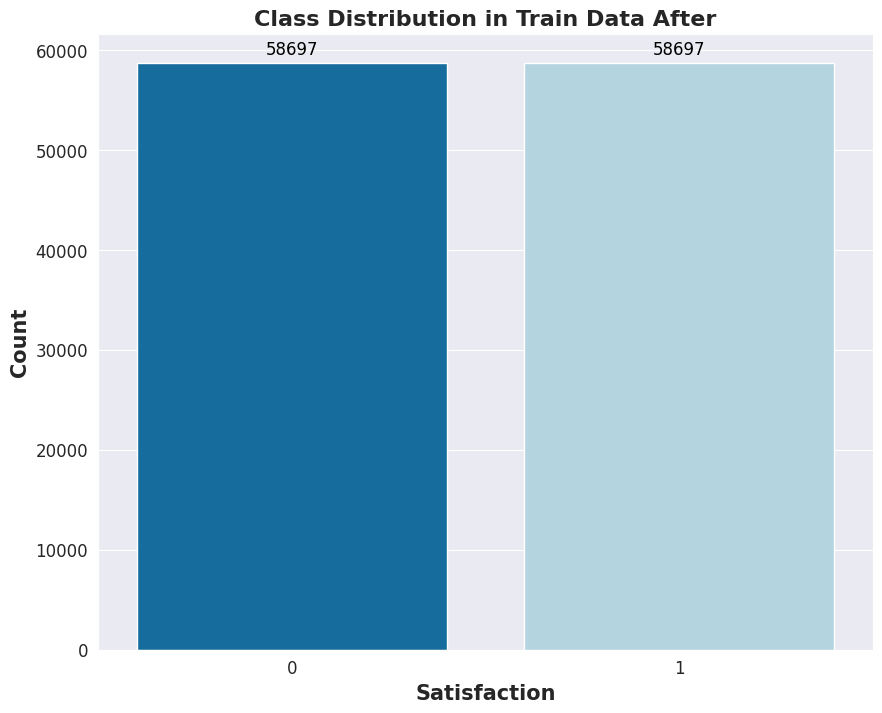

In [64]:
custom_palette = ["#0072B2", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)
ax = sns.countplot(x='satisfaction', data=train)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')

plt.title('Class Distribution in Train Data After', fontweight='bold', fontsize=16)
plt.xlabel('Satisfaction', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

<a id="8"></a>
#  <p style="padding:5px;background-color:#7EC0EE;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Model building & Evalution ⚙️ 📈</p>

In [65]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [66]:
def plot_roc_auc(model, X_test, y_test, y_pred=None):
  if(y_pred is None):
    y_pred =  model.decision_function(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  roc_auc = auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  return fpr, tpr, thresholds

In [67]:
def plot_roc_auc2(model, X_test, y_test, y_pred=None):
    if y_pred is None:
        y_pred = model.predict_proba(X_test)[:, 1]  # Use the predicted probabilities of the positive class

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return fpr, tpr, thresholds

🔘 **Model 1: Logistic Regression**

In [68]:
lr_model = LogisticRegression()

In [69]:
accuracy_scores = []

# Performing k-fold cross-validation
for train_index, val_index in k_fold.split(X_train):
    # Splitting the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fitting the logistic regression model on the training data
    lr_model.fit(X_train_fold, y_train_fold)

    # Predicting the labels for the validation data
    ylr_val_pred = lr_model.predict(X_val_fold)

    # Calculating the accuracy score for the current fold
    accuracy = accuracy_score(y_val_fold, ylr_val_pred)
    accuracy_scores.append(accuracy)


In [70]:
avglr_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the KNN model using k-fold cross-validation is: {:.2f}%".format(
    avglr_accuracy * 100))

The average accuracy of the KNN model using k-fold cross-validation is: 87.08%


In [71]:
classification_rep = classification_report(y_val_fold, ylr_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5832
           1       0.87      0.84      0.85      4527

    accuracy                           0.88     10359
   macro avg       0.87      0.87      0.87     10359
weighted avg       0.88      0.88      0.87     10359



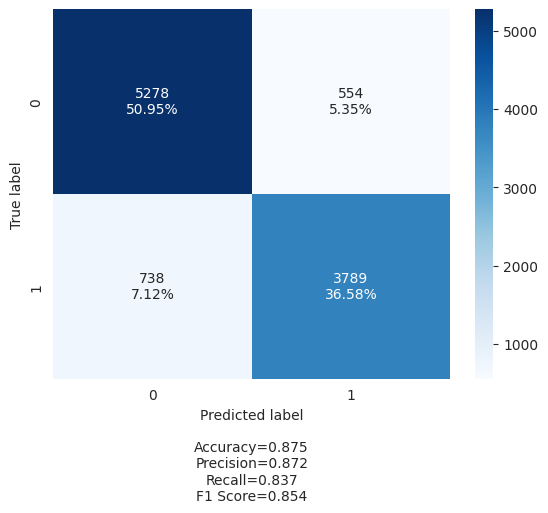

In [72]:
cm = confusion_matrix(y_val_fold, ylr_val_pred)
make_confusion_matrix(cm)

(array([0.      , 0.      , 0.      , ..., 0.999587, 0.999587, 1.      ]),
 array([0.00000000e+00, 8.79894413e-05, 3.38759349e-02, ...,
        9.99912011e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99568367e+00, 9.95683673e-01, 9.83341524e-01, ...,
        1.06588349e-03, 1.03708888e-03, 1.19420607e-04]))

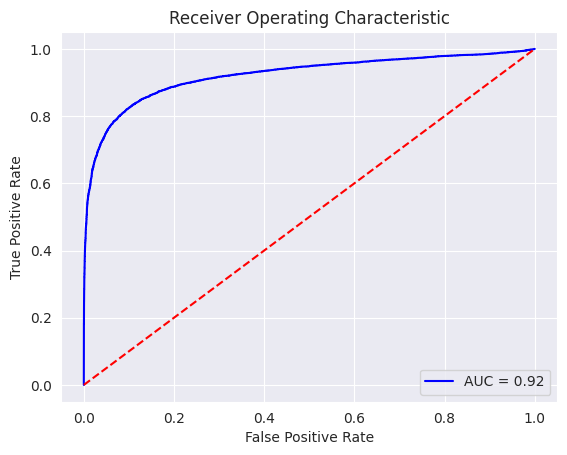

In [73]:
plot_roc_auc2(lr_model, X_test, y_test, y_pred=None)

🔘 **Model 2: XGBoost Classifier**

In [74]:
xgboost_model = XGBClassifier()

In [75]:
accuracy_scores = []


for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgboost_model.fit(X_train_fold, y_train_fold)

    yxg_val_pred = xgboost_model.predict(X_val_fold)

    xgscore = accuracy_score(y_val_fold, yxg_val_pred)
    accuracy_scores.append(xgscore)

In [76]:
avgXGBoost_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the XGBoost model using k-fold cross-validation is: {:.2f}%".format(
    avgXGBoost_accuracy * 100))

The average accuracy of the XGBoost model using k-fold cross-validation is: 96.05%


In [77]:
classification_rep = classification_report(y_val_fold, yxg_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5832
           1       0.97      0.94      0.95      4527

    accuracy                           0.96     10359
   macro avg       0.96      0.96      0.96     10359
weighted avg       0.96      0.96      0.96     10359



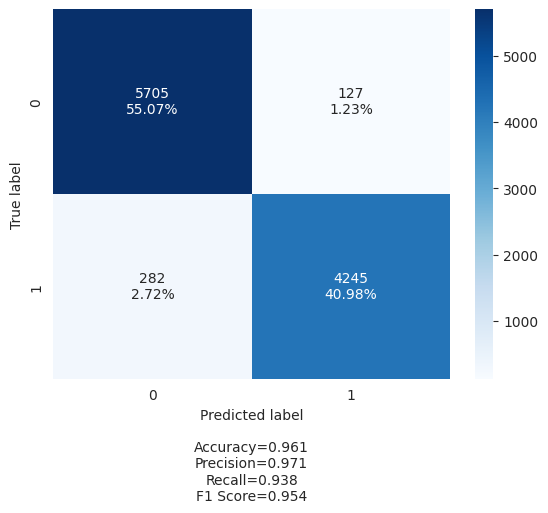

In [78]:
cm = confusion_matrix(y_val_fold, yxg_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.78565529, 0.78579295,
        1.        ]),
 array([0.        , 0.00123185, 0.00431148, ..., 1.        , 1.        ,
        1.        ]),
 array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 1.4310368e-04,
        1.4293402e-04, 8.3705949e-08], dtype=float32))

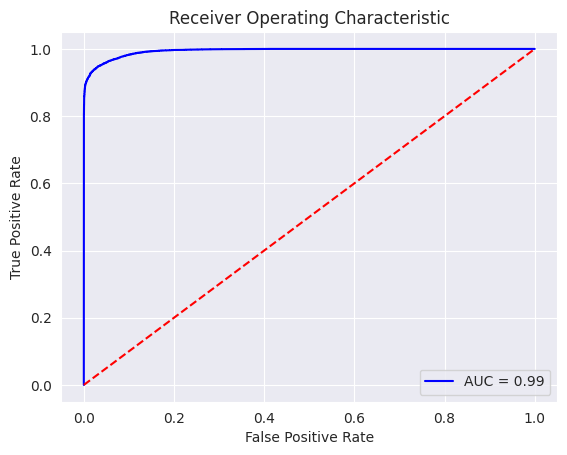

In [79]:
plot_roc_auc2(xgboost_model, X_test, y_test, y_pred=None)

🔘 **Model 3: RandomForestClassifier**

In [80]:
random_forest_model = RandomForestClassifier()

In [81]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    random_forest_model.fit(X_train_fold, y_train_fold)

    yrf_val_pred = random_forest_model.predict(X_val_fold)

    rfscore = accuracy_score(y_val_fold, yrf_val_pred)
    accuracy_scores.append(rfscore)

In [82]:
avgRF_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the RF model using k-fold cross-validation is: {:.2f}%".format(
    avgRF_accuracy * 100))

The average accuracy of the RF model using k-fold cross-validation is: 96.05%


In [83]:
classification_rep = classification_report(y_val_fold, yrf_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5832
           1       0.97      0.94      0.95      4527

    accuracy                           0.96     10359
   macro avg       0.96      0.96      0.96     10359
weighted avg       0.96      0.96      0.96     10359



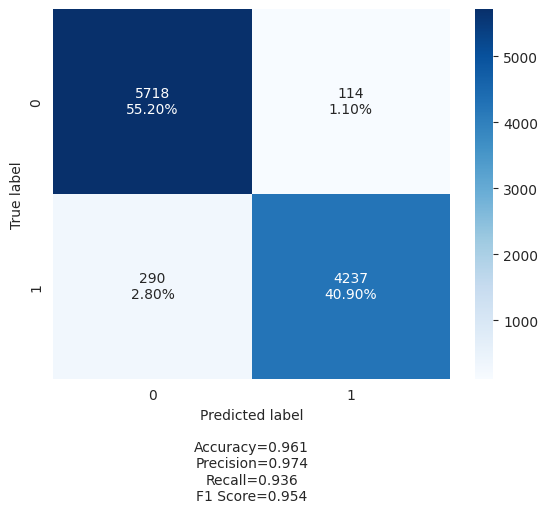

In [84]:
cm = confusion_matrix(y_val_fold, yrf_val_pred)
make_confusion_matrix(cm)

(array([0.00000000e+00, 1.37665198e-04, 1.37665198e-04, 1.37665198e-04,
        1.37665198e-04, 2.06497797e-04, 2.06497797e-04, 2.75330396e-04,
        2.75330396e-04, 3.44162996e-04, 4.12995595e-04, 6.19493392e-04,
        7.57158590e-04, 8.25991189e-04, 1.10132159e-03, 1.23898678e-03,
        1.37665198e-03, 1.51431718e-03, 1.72081498e-03, 2.06497797e-03,
        2.47797357e-03, 2.82213656e-03, 3.16629956e-03, 3.30396476e-03,
        3.64812775e-03, 4.26762115e-03, 4.74944934e-03, 5.23127753e-03,
        5.64427313e-03, 6.26376652e-03, 7.02092511e-03, 7.77808370e-03,
        8.46640969e-03, 9.01707048e-03, 9.63656388e-03, 9.98072687e-03,
        1.05313877e-02, 1.11508811e-02, 1.20457048e-02, 1.25963656e-02,
        1.32158590e-02, 1.42483480e-02, 1.55561674e-02, 1.63821586e-02,
        1.76899780e-02, 1.85159692e-02, 1.89977974e-02, 1.96861233e-02,
        2.08562775e-02, 2.16822687e-02, 2.27835903e-02, 2.45732379e-02,
        2.62252203e-02, 2.75330396e-02, 2.90473568e-02, 3.049284

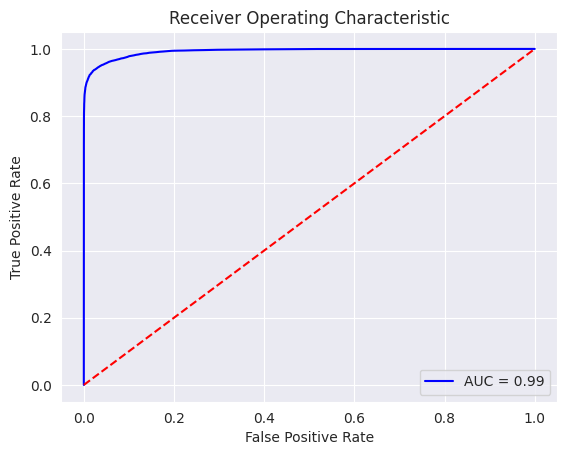

In [85]:
plot_roc_auc2(random_forest_model, X_test, y_test, y_pred=None)

🔘 **Model 4: KNeighborsClassifier**

In [86]:
knn_model= KNeighborsClassifier()

In [87]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    knn_model.fit(X_train_fold, y_train_fold)

    yknn_val_pred = knn_model.predict(X_val_fold)

    knnscore = accuracy_score(y_val_fold, yknn_val_pred)
    accuracy_scores.append(knnscore)

In [88]:
accuracy_scores

[0.9293436293436294,
 0.9299227799227799,
 0.9278957528957529,
 0.9266409266409267,
 0.9321363065933005,
 0.9301090838884062,
 0.929336808572256,
 0.9278887923544744,
 0.9315571001061879,
 0.9334877883965633]

In [89]:
avgknn_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the KNN model using k-fold cross-validation is: {:.2f}%".format(
    avgknn_accuracy * 100))

The average accuracy of the KNN model using k-fold cross-validation is: 92.98%


In [90]:
classification_rep = classification_report(y_val_fold, yknn_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5832
           1       0.96      0.89      0.92      4527

    accuracy                           0.93     10359
   macro avg       0.94      0.93      0.93     10359
weighted avg       0.93      0.93      0.93     10359



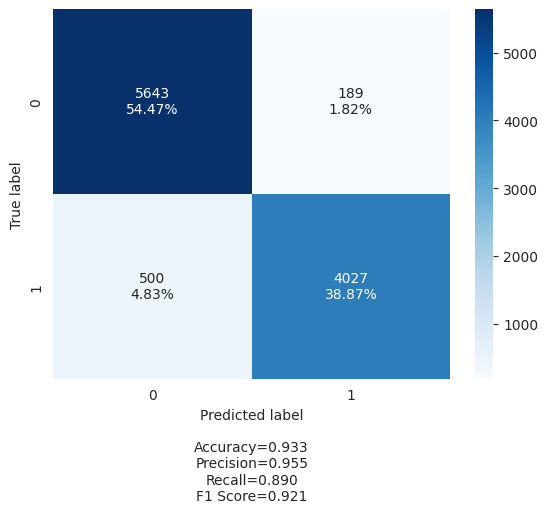

In [91]:
cm = confusion_matrix(y_val_fold, yknn_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.00481828, 0.01645099, 0.04123073, 0.08817456,
        0.20216134, 1.        ]),
 array([0.        , 0.74562253, 0.83290805, 0.89115706, 0.93647162,
        0.97430708, 1.        ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

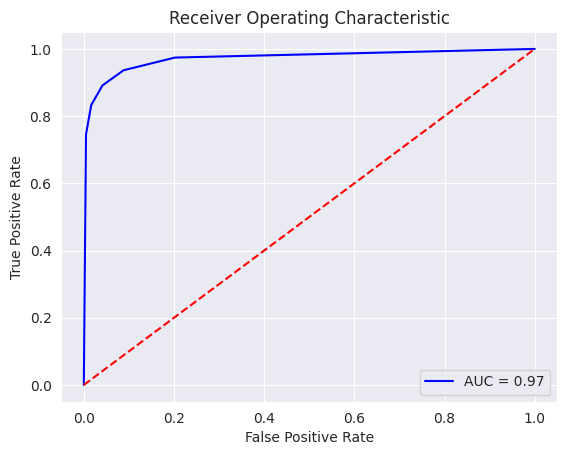

In [92]:
plot_roc_auc2(knn_model, X_test, y_test, y_pred=None)

🔘 **Model 5: DecisionTreeClassifier**

In [93]:
dt_model = DecisionTreeClassifier()

In [94]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dt_model.fit(X_train_fold, y_train_fold)

    ydt_val_pred = dt_model.predict(X_val_fold)

    dtscore = accuracy_score(y_val_fold, ydt_val_pred)
    accuracy_scores.append(dtscore)

In [95]:
accuracy_scores

[0.9439189189189189,
 0.9432432432432433,
 0.9412162162162162,
 0.9407335907335908,
 0.9391833188531712,
 0.9410174727290279,
 0.9426585577758471,
 0.9409209383145091,
 0.9423689545322907,
 0.9438169707500724]

In [96]:
avgdt_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the DT model using k-fold cross-validation is: {:.2f}%".format(
    avgdt_accuracy * 100))

The average accuracy of the DT model using k-fold cross-validation is: 94.19%


In [97]:
classification_rep = classification_report(y_val_fold, ydt_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5832
           1       0.94      0.94      0.94      4527

    accuracy                           0.94     10359
   macro avg       0.94      0.94      0.94     10359
weighted avg       0.94      0.94      0.94     10359



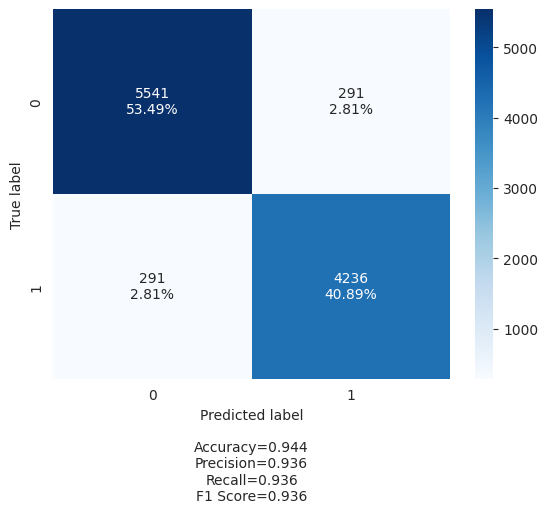

In [98]:
cm = confusion_matrix(y_val_fold, ydt_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.05465308, 1.        ]),
 array([0.        , 0.93647162, 1.        ]),
 array([2., 1., 0.]))

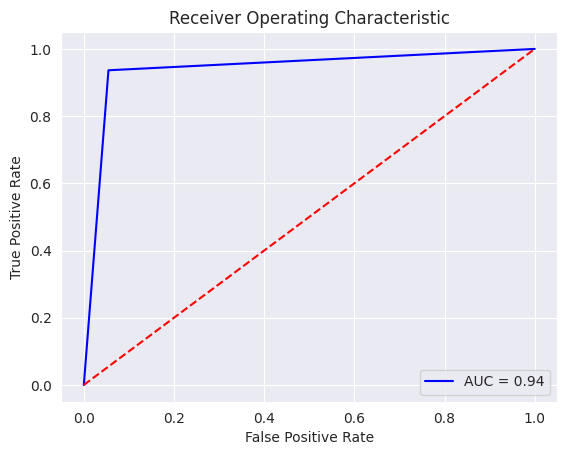

In [99]:
plot_roc_auc2(dt_model, X_test, y_test, y_pred=None)

🔘 **Model 6: SVM**

In [100]:
svm_model = SVC()

In [101]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    svm_model.fit(X_train_fold, y_train_fold)

    ysvm_val_pred = svm_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, ysvm_val_pred)
    accuracy_scores.append(accuracy_fold)

In [102]:
accuracy_scores

[0.9532818532818533,
 0.9517374517374517,
 0.9461389961389961,
 0.950965250965251,
 0.952601602471281,
 0.9499951732792741,
 0.9483540882324548,
 0.9496090356211989,
 0.952215464813206,
 0.9535669466164688]

In [103]:
avgsvm_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the SVM model using k-fold cross-validation is: {:.2f}%".format(
    avgsvm_accuracy * 100))

The average accuracy of the SVM model using k-fold cross-validation is: 95.08%


In [104]:
classification_rep = classification_report(y_val_fold, ysvm_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5832
           1       0.96      0.93      0.95      4527

    accuracy                           0.95     10359
   macro avg       0.95      0.95      0.95     10359
weighted avg       0.95      0.95      0.95     10359



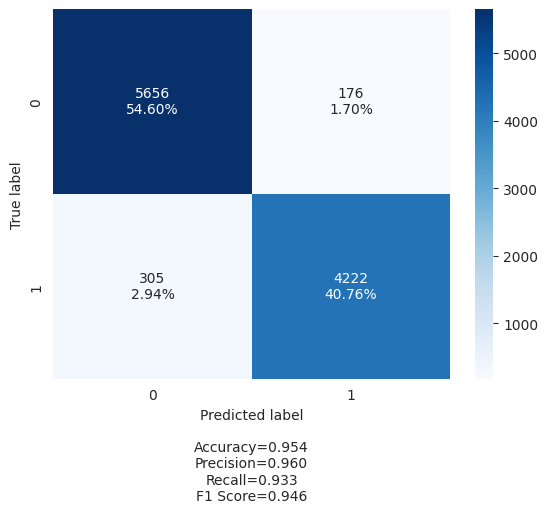

In [105]:
cm = confusion_matrix(y_val_fold, ysvm_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.97109031, 0.97109031,
        1.        ]),
 array([0.00000000e+00, 8.79894413e-05, 5.70699516e-01, ...,
        9.99912011e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 7.78018673,  6.78018673,  1.96127208, ..., -3.44466523,
        -3.4452359 , -4.8776094 ]))

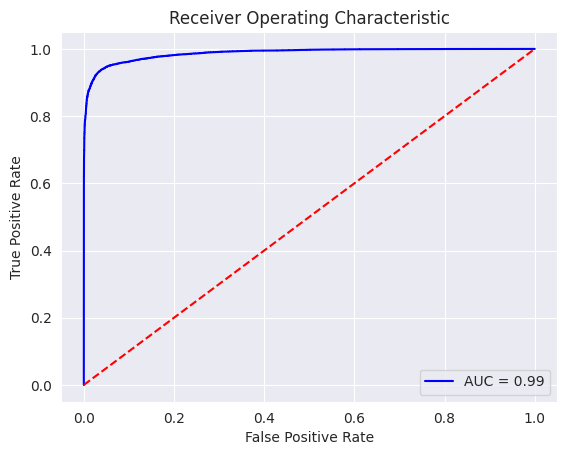

In [106]:
plot_roc_auc(svm_model, X_test, y_test, y_pred=None)

🔘 **Model 7: Naive Bayes**

In [107]:
nb_model = GaussianNB()

In [108]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    nb_model.fit(X_train_fold, y_train_fold)

    ynb_val_pred = nb_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, ynb_val_pred)
    accuracy_scores.append(accuracy_fold)

In [109]:
accuracy_scores

[0.8448841698841699,
 0.8495173745173745,
 0.8443050193050193,
 0.8444980694980695,
 0.8503716574958973,
 0.8455449367699585,
 0.8475721594748528,
 0.8512404672265663,
 0.8519162081281977,
 0.8513370016410851]

In [110]:
avgnb_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the Naive Bayes model using k-fold cross-validation is: {:.2f}%".format(
    avgnb_accuracy * 100))

The average accuracy of the Naive Bayes model using k-fold cross-validation is: 84.81%


In [111]:
classification_rep = classification_report(y_val_fold, ynb_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5832
           1       0.84      0.82      0.83      4527

    accuracy                           0.85     10359
   macro avg       0.85      0.85      0.85     10359
weighted avg       0.85      0.85      0.85     10359



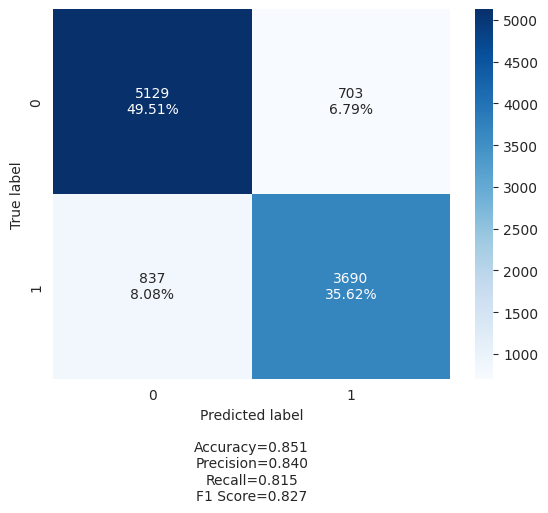

In [112]:
cm = confusion_matrix(y_val_fold, ynb_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.99814152, 0.99814152,
        1.        ]),
 array([0.00000000e+00, 8.79894413e-05, 8.79894413e-03, ...,
        9.99912011e-01, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 9.99999999e-01, 9.99999985e-01, ...,
        1.11532441e-13, 1.05109974e-13, 1.58385309e-57]))

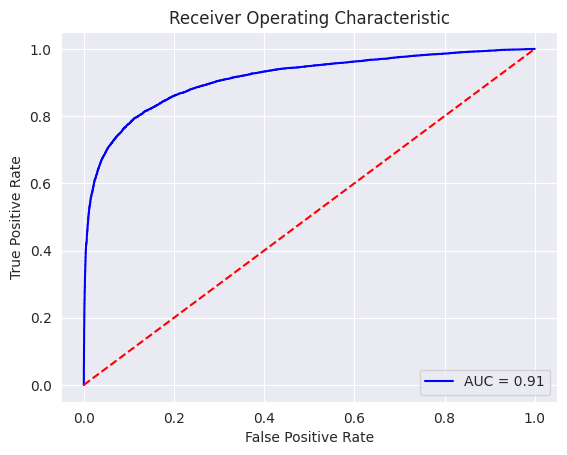

In [113]:
plot_roc_auc2(nb_model, X_test, y_test, y_pred=None)

🔘 **Model 8: Bagging Classifier**

In [114]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

In [115]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    bagging_model.fit(X_train_fold, y_train_fold)

    y_val_pred = bagging_model.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores.append(accuracy)

In [116]:
accuracy_scores

[0.961003861003861,
 0.9611003861003861,
 0.9569498069498069,
 0.9572393822393822,
 0.9579109952698137,
 0.9574283231972198,
 0.9581040640988513,
 0.9576213920262574,
 0.9617723718505647,
 0.9597451491456704]

In [117]:
avgBagging_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the Bagging Classifier using k-fold cross-validation is: {:.2f}%".format(
    avgBagging_accuracy * 100))

The average accuracy of the Bagging Classifier using k-fold cross-validation is: 95.89%


In [118]:
classification_rep = classification_report(y_val_fold, y_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5832
           1       0.97      0.93      0.95      4527

    accuracy                           0.96     10359
   macro avg       0.96      0.96      0.96     10359
weighted avg       0.96      0.96      0.96     10359



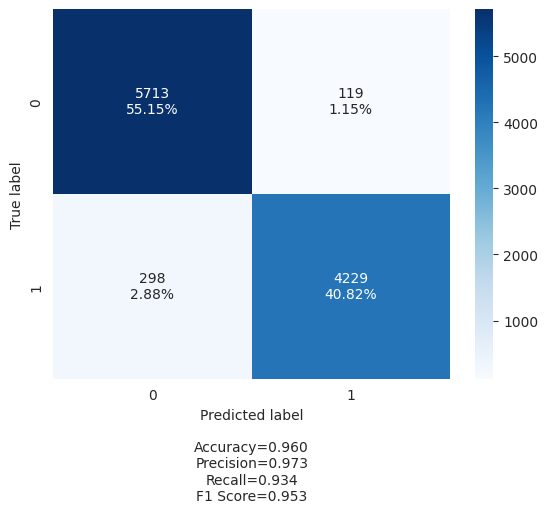

In [119]:
cm = confusion_matrix(y_val_fold, y_val_pred)
make_confusion_matrix(cm)

(array([0.00000000e+00, 2.75330396e-04, 4.81828194e-04, 7.57158590e-04,
        8.94823789e-04, 9.63656388e-04, 1.10132159e-03, 1.23898678e-03,
        1.30781938e-03, 1.51431718e-03, 1.72081498e-03, 2.27147577e-03,
        2.61563877e-03, 2.61563877e-03, 2.82213656e-03, 3.02863436e-03,
        3.30396476e-03, 3.71696035e-03, 3.92345815e-03, 4.19878855e-03,
        4.40528634e-03, 4.68061674e-03, 4.95594714e-03, 5.30011013e-03,
        5.85077093e-03, 6.33259912e-03, 7.15859031e-03, 7.43392070e-03,
        8.19107930e-03, 8.67290749e-03, 9.01707048e-03, 9.63656388e-03,
        1.03937225e-02, 1.11508811e-02, 1.22522026e-02, 1.30093612e-02,
        1.32158590e-02, 1.36288546e-02, 1.39730176e-02, 1.45236784e-02,
        1.52120044e-02, 1.59691630e-02, 1.63133260e-02, 1.69328194e-02,
        1.76899780e-02, 1.82406388e-02, 1.90666300e-02, 2.00991189e-02,
        2.09939427e-02, 2.25082599e-02, 2.36784141e-02, 2.51238987e-02,
        2.62940529e-02, 2.72577093e-02, 2.90473568e-02, 3.028634

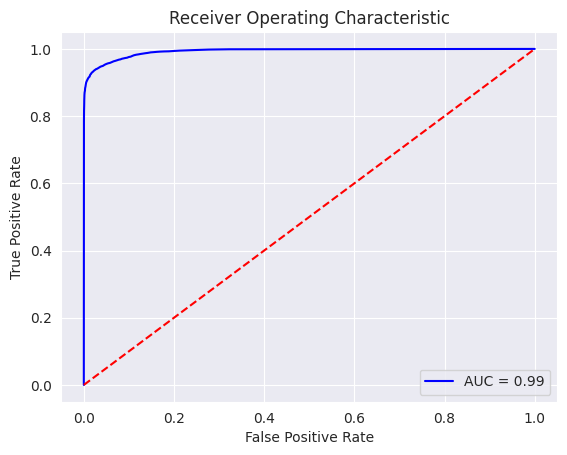

In [120]:
plot_roc_auc2(bagging_model, X_test, y_test, y_pred=None)

🔘 **Model 9: AdaBoosting Classifier**

In [121]:
adaboost_model  = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=4)

In [122]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    adaboost_model.fit(X_train_fold, y_train_fold)

    y_val_pred = adaboost_model.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores.append(accuracy)

In [123]:
accuracy_scores

[0.9441119691119692,
 0.9423745173745174,
 0.9416023166023166,
 0.9417953667953668,
 0.9408244038999903,
 0.9420793512887344,
 0.9409209383145091,
 0.9413070759725842,
 0.94401003957911,
 0.9428516266048846]

In [124]:
avgAbaboosting_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the Bagging Classifier using k-fold cross-validation is: {:.2f}%".format(
    avgAbaboosting_accuracy * 100))

The average accuracy of the Bagging Classifier using k-fold cross-validation is: 94.22%


In [125]:
classification_rep = classification_report(y_val_fold, y_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5832
           1       0.93      0.94      0.93      4527

    accuracy                           0.94     10359
   macro avg       0.94      0.94      0.94     10359
weighted avg       0.94      0.94      0.94     10359



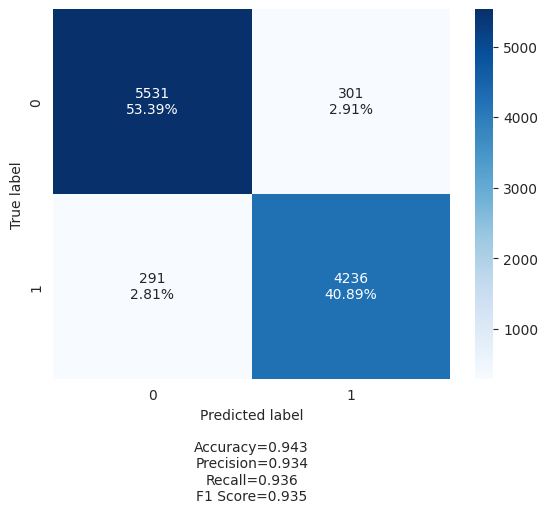

In [126]:
cm = confusion_matrix(y_val_fold, y_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.05258811, 1.        ]),
 array([0.        , 0.93611967, 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 2.22044605e-16]))

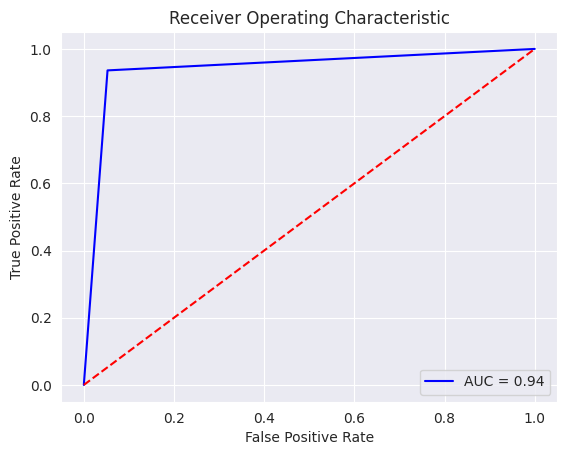

In [127]:
plot_roc_auc2(adaboost_model, X_test, y_test, y_pred=None)

---

In [128]:
model_accuracies = {}
model_accuracies['LogisticRegression'] = avglr_accuracy
model_accuracies['RandomForestClassifier'] = avgRF_accuracy
model_accuracies['KNeighborsClassifier'] = avgknn_accuracy
model_accuracies['DecisionTreeClassifier'] = avgdt_accuracy
model_accuracies['SVM'] = avgsvm_accuracy
model_accuracies['XGBoost'] = avgXGBoost_accuracy
model_accuracies['Naive Bayes'] = avgnb_accuracy
model_accuracies['Bagging Classifier'] = avgBagging_accuracy
model_accuracies['AdaBoosting Classifier'] = avgAbaboosting_accuracy

In [129]:
results = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])
results = results.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Blues')
results

,Model,Accuracy
5,XGBoost,0.960509
1,RandomForestClassifier,0.960451
7,Bagging Classifier,0.958888
4,SVM,0.950847
8,AdaBoosting Classifier,0.942188
3,DecisionTreeClassifier,0.941908
2,KNeighborsClassifier,0.929832
0,LogisticRegression,0.870813
6,Naive Bayes,0.848119
